# Introduction to the Credit Card Fraud Detection Dataset:

The Credit Card Fraud Detection dataset, available on Kaggle, contains anonymized credit card transactions made by European cardholders in September 2013. The dataset is widely used for building machine learning models aimed at detecting fraudulent transactions. It consists of 284,807 transactions, of which 492 (approximately 0.17%) are classified as fraudulent, making it a highly imbalanced dataset — a common challenge in fraud detection problems.

Due to privacy concerns, most features in the dataset have been transformed using Principal Component Analysis (PCA), and are labeled as V1 to V28. This transformation helps protect sensitive information like transaction amounts and user details. The dataset also includes two other features: "Time", which represents the time difference between transactions, and "Amount", which reflects the transaction amount.

The objective of the project is to classify transactions as fraudulent (1) or non-fraudulent (0) using this anonymized data, and to address challenges such as class imbalance and feature interpretation. This dataset serves as an excellent resource for practicing anomaly detection and classification techniques in the context of financial data.



# Our Goals:

* Understand the little distribution of the "little" data that was provided to us.
* Create a 50/50 sub-dataframe ratio of "Fraud" and "Non-Fraud" transactions. (NearMiss Algorithm)
* Determine the Classifiers we are going to use and decide which one has a higher accuracy.
* Create a Neural Network and compare the accuracy to our best classifier.
* Understand common mistaked made with imbalanced datasets.

# -------------------------**Understanding our data**--------------------------

# Gather Sense of Our Data:
The first thing we must do is gather a basic sense of our data. Remember, except for the transaction and amount we dont know what the other columns are (due to privacy reasons). The only thing we know, is that those columns that are unknown have been scaled already.

# Summary:

* The transaction amount is relatively small. 
* The mean of all the mounts made is approximately USD 88.
* There are no "Null" values, so we don't have to work on ways to replace values.
* Most of the transactions were Non-Fraud (99.83%) of the time, while Fraud transactions occurs (017%) of the time in the dataframe.

# Feature Technicalities:

* PCA Transformation: The description of the data says that all the features went through a PCA transformation (Dimensionality Reduction technique) (Except for time and amount).
* Scaling: Keep in mind that in order to implement a PCA transformation features need to be previously scaled. (In this case, all the V features have been scaled or at least that is what we are assuming the people that develop the dataset did.)

<table border="1" cellpadding="10" cellspacing="0">
  <thead>
    <tr>
      <th>Library</th>
      <th>Purpose</th>
      <th>Usage in Credit Card Fraud Detection</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><b>numpy</b></td>
      <td>Numerical computations</td>
      <td>Used for efficient array operations and mathematical calculations on the dataset, like handling numerical features.</td>
    </tr>
    <tr>
      <td><b>pandas</b></td>
      <td>Data manipulation and analysis</td>
      <td>Used to load the dataset, clean data, handle missing values, and explore the fraud/non-fraud transactions using DataFrames.</td>
    </tr>
    <tr>
      <td><b>tensorflow</b></td>
      <td>Deep learning framework</td>
      <td>Used to create neural network models for classifying transactions as fraudulent or non-fraudulent.</td>
    </tr>
    <tr>
      <td><b>matplotlib.pyplot</b></td>
      <td>Data visualization</td>
      <td>Creates plots and visualizations (e.g., fraud/non-fraud distribution, feature correlations).</td>
    </tr>
    <tr>
      <td><b>seaborn</b></td>
      <td>Statistical data visualization</td>
      <td>Used for advanced visualizations like heatmaps and boxplots to explore data trends and relationships between features.</td>
    </tr>
    <tr>
      <td><b>TSNE</b></td>
      <td>Dimensionality reduction</td>
      <td>Used to reduce high-dimensional data to 2D or 3D for visualizing relationships between fraud and non-fraud data points.</td>
    </tr>
    <tr>
      <td><b>PCA & TruncatedSVD</b></td>
      <td>Dimensionality reduction</td>
      <td>Used to reduce the number of features while retaining key information. Especially useful after the dataset's PCA transformation.</td>
    </tr>
    <tr>
      <td><b>LogisticRegression, SVC, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier</b></td>
      <td>Machine learning classifiers</td>
      <td>Used for building models to classify whether a transaction is fraudulent or not using various algorithms.</td>
    </tr>
    <tr>
      <td><b>train_test_split</b></td>
      <td>Model evaluation</td>
      <td>Used to split the dataset into training and testing sets for model validation and performance evaluation.</td>
    </tr>
    <tr>
      <td><b>SMOTE, NearMiss</b></td>
      <td>Imbalanced data handling</td>
      <td>SMOTE is used to oversample minority (fraudulent) class, and NearMiss is used to undersample majority class to balance the dataset.</td>
    </tr>
    <tr>
      <td><b>classification_report_imbalanced</b></td>
      <td>Evaluation metric</td>
      <td>Used to generate a classification report specifically for imbalanced datasets, including precision, recall, F1-score.</td>
    </tr>
    <tr>
      <td><b>KFold, StratifiedKFold</b></td>
      <td>Cross-validation</td>
      <td>Used to perform cross-validation to ensure the model generalizes well on unseen data, particularly in an imbalanced setting.</td>
    </tr>
  </tbody>
</table>


In [1]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(r'/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

2024-10-13 23:02:17.371780: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-13 23:02:17.371906: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-13 23:02:17.505971: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Understanding about: (df.describe()) and its Table Contents

1. Columns (Features):
Time, V1, V2, V3, ..., V28: These are feature columns in the dataset. In the Credit Card Fraud Detection dataset, features V1 to V28 are the result of a PCA transformation (to protect data privacy). The Time column represents the time difference in seconds from the first transaction.
Amount and Class columns, which are likely included---
Amount: Represents the transaction amount.
Class: The label for whether the transaction is fraud (1) or non-fraud (0).
2. Rows (Statistical Measures):
Count: The number of non-null entries for each column. In this case, there are 284,807 entries for each feature, meaning no missing values.
Mean: The average value for each feature.
Std (Standard Deviation): Measures the amount of variation or dispersion in the data for each feature.
Min: The minimum value for each feature.
25% (First Quartile): The value below which 25% of the data lies.
50% (Median): The median value, or the value below which 50% of the data lies.
75% (Third Quartile): The value below which 75% of the data lies.
Max: The maximum value for each feature.
Observations from the Data:
Time:

3. The minimum value of Time is 0, which represents the start of the recorded transactions.
4. The maximum value is 172,792 seconds (approx. 48 hours), which means the data spans roughly two days.
Features V1 to V28:

4. These features are scaled as part of PCA, and their mean values are close to 0 (which is typical after applying PCA).
5. The standard deviation (std) varies across features, with some features having more variance (like V1 with std = 1.958) than others (like V4 with std = 1.415).

6. Distribution of Data:
For most features, the 50% (median) value is very close to the mean, indicating that the data may be symmetrically distributed around the mean.
The range between the minimum and maximum values suggests that features are well scaled, except for some extremes.
Overall:
The describe() output shows that the dataset is clean (no missing values) and well-processed, with scaled features thanks to PCA.
The next steps would likely involve balancing the dataset (as fraud cases are a minority), applying modeling techniques, and tuning the model based on this summary understanding.

In [3]:
# So as per our table - Its clerly showing there is no null values ! ( Kudos to PCA )
df.isnull().sum().max() # If you want, go head check here once

0

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
# # The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Note: Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

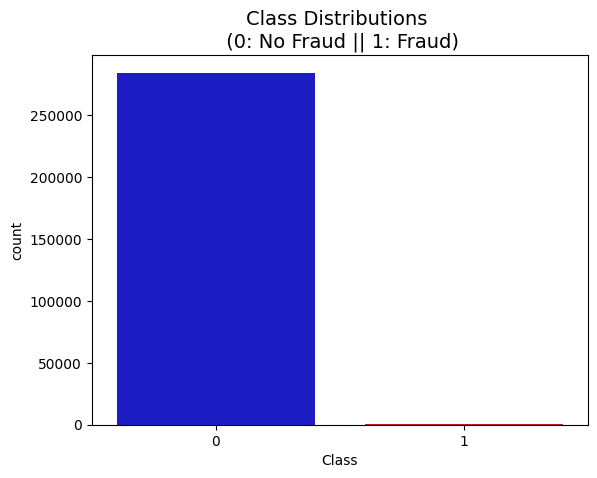

In [6]:
colors = ['#0101DF', '#DF0101']

sns.countplot(x = 'Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

**Distributions**: By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

# Diff b/w Distibution of transa. Amount and Time

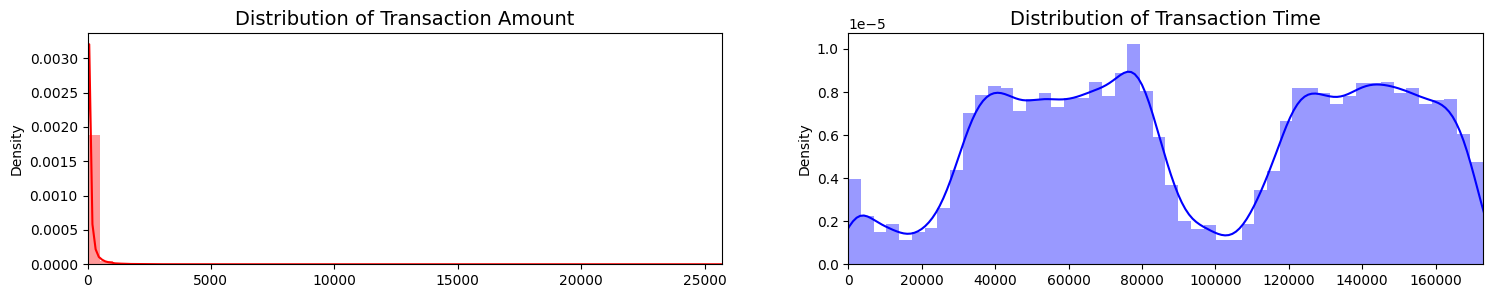

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(18,3))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

# **Scaling and Distributing**



1. **Scaling**
What it means: Scaling is the process of standardizing or normalizing the values of features to ensure they are in the same range. Many machine learning algorithms (such as those that rely on distance-based metrics like logistic regression, SVMs, or neural networks) perform better when features are on similar scales. This ensures no one feature (like an amount in dollars) dominates the others (like transformed features from PCA).

**In this case (Time and Amount):****

**The Time feature represents** the time in seconds from the first transaction. Its values are quite large compared to other features (which are already scaled due to PCA). To avoid biasing models that are sensitive to scale, this feature should be scaled.

**The Amount feature represents** the transaction amount in dollars (or the local currency), which can vary widely. For consistency, this feature should also be scaled, especially because it's in a different numerical range compared to the PCA-transformed features (V1 to V28).


2. **Distributing (Balancing the Dataset)**
What it means: The dataset is highly imbalanced, with many more Non-Fraud cases (0) compared to Fraud cases (1). This imbalance can cause machine learning models to be biased toward predicting the majority class (Non-Fraud), resulting in poor performance on Fraud detection.

**Sub-sampling**: To help algorithms learn the patterns that distinguish Fraud from Non-Fraud transactions, it's useful to create a balanced dataset (equal number of Fraud and Non-Fraud cases). This can be done by undersampling the majority class (Non-Fraud) or oversampling the minority class (Fraud).

**Undersampling**: You randomly reduce the number of Non-Fraud samples to match the number of Fraud samples.
Oversampling: You duplicate (or synthetically create) Fraud cases to balance with the Non-Fraud cases.
This balanced sub-sample allows the model to better understand the characteristics that distinguish Fraud from Non-Fraud without being overwhelmed by the majority class.

**Wrong Correlations**: Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result (Fraud or No Fraud) by having an imbalance dataframe we are not able to see the true correlations between the class and features.


**Putting it All Together:**
* Scaling ensures that all features are on the same scale, especially important for models that are sensitive to feature magnitude.
* Distributing refers to balancing the dataset to prevent the model from being biased toward the majority class, ensuring better learning of Fraud patterns.
* This paragraph is explaining that you will first scale the Time and Amount columns and then create a balanced dataset so your model can perform better at detecting fraudulent transactions.
* Scaled amount and scaled time are the columns with scaled values.
* There are 492 cases of fraud in our dataset so we can randomly get 492 cases of non-fraud to create our new sub dataframe.
* We concat the 492 cases of fraud and non fraud, creating a new sub-sample.

# Scaling the Amount and Time Columns:

**Why Choose These Scalers?**
**Amount with RobustScaler**: Financial transactions (amounts) often have extreme outliers (e.g., very large purchases), so RobustScaler helps minimize the effect of these outliers while still scaling the data appropriately.

**Time with StandardScaler**: Time differences between transactions may not have extreme outliers and are likely to follow a relatively normal distribution, so StandardScaler is a good choice to standardize these values.

In [8]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

Why remove them?: This is typically done to avoid duplication. If those columns already exist in the DataFrame, and you're trying to re-insert updated or newly scaled versions of them at specific positions, you must first remove the old columns. Otherwise, inserting them again would result in duplicate columns, or it could cause an error.

In [9]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Aount andTime are Scaled!.

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


# **Splitting the Data (Original DataFrame)**

Why Separate the Original Dataset Before Sampling?
Preserve the Integrity of the Test Set:

The goal of machine learning is to create a model that generalizes well to unseen data. To evaluate how well your model performs, you need a test set that mimics real-world data, where the class distribution (e.g., the ratio of fraud to non-fraud) is imbalanced as in the original dataset.
If you oversample or undersample both the training and test sets, the test set will no longer reflect the true distribution of fraud vs. non-fraud. This would give an inaccurate representation of the model's performance in the real world.
Train on Balanced Data, Test on Original Data:

**Training**: By undersampling or oversampling, you create a balanced training set to help the model learn the patterns that distinguish fraud from non-fraud more effectively. This is essential because an imbalanced dataset can cause the model to focus too much on the majority class (non-fraud) and fail to learn the characteristics of the minority class (fraud).

**Testing**: However, after training, you want to test the model on the original, imbalanced data to see how well it generalizes. Testing on the original dataset gives a realistic assessment of how the model will perform in the real world, where fraud cases are rare.

**Avoid Data Leakage:**

If you apply sampling techniques to the entire dataset before splitting into training and testing sets, it may introduce data leakage, where information from the test set leaks into the training process. This can cause the model to perform unrealistically well during testing because it has already "seen" part of the test set.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print('Train:', train_index, 'Test:', test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
    # Check the Distributions of the labels
    
    # Turn into an array
    original_Xtrain = original_Xtrain.values
    original_Xtest = original_Xtest.values
    original_ytrain = original_ytrain.values
    original_ytest = original_ytest.values
    
    # See if both the train and test label distribution are similarly distributed
    train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
    test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
    print('-' * 100)
    
    print('Label Distributions: \n')
    print(train_counts_label/ len(original_ytrain))
    print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827514 0.00172486]
[0.998262 0.001738]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827514 0.00172486]
[0.998262 0.001738]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]


1. **Stratified K-Folds Cross-Validation:**
Purpose: The key idea behind using StratifiedKFold is to ensure that each fold (both the training and test sets) has the same proportion of classes (fraud and non-fraud transactions) as the original dataset. This is particularly useful for imbalanced datasets like credit card fraud detection, where fraudulent transactions are very rare compared to non-fraudulent ones.

Normally, if you split the data without stratification, you could end up with a test set that has very few or even no fraudulent transactions, which can make your model's evaluation less reliable. Stratified K-Folds prevents this by ensuring that the splits maintain the same class distribution as the overall dataset.

2. **Initialization of StratifiedKFold:**
python
Copy code
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
n_splits=5: This means the dataset will be split into 5 equal parts (or "folds"). Four of these parts will be used for training and one for testing, and this process is repeated five times so that each fold is used once as the test set.

random_state=None: This is optional and controls the shuffling applied to the data before splitting. Setting random_state ensures reproducibility (i.e., getting the same splits every time you run the code), but here it's left as None, so no reproducibility is enforced.

shuffle=False: The data is not shuffled before being split. By default, the data will be split in its original order. If your dataset has patterns (e.g., sorted by time), it might be better to set shuffle=True to randomize it first.

3. **Iterating Through Splits:**
python
Copy code
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
sss.split(X, y): This function splits the features (X) and the target (y) based on the stratified k-folds approach. For each iteration, it returns two arrays:

train_index: The indices of the training set.
test_index: The indices of the test set.
Train and Test Sets in Each Fold:

In each iteration, the data is split into training and test sets using the indices generated by StratifiedKFold.
X.iloc[train_index] and X.iloc[test_index]: These lines use the iloc[] method to access rows of X corresponding to the training and test indices. Similarly, y.iloc[train_index] and y.iloc[test_index] are used to access the target values (fraud or non-fraud) for the training and test sets.
This way, the features (X) and the target (y) are split into the training and testing portions, ensuring that each fold has the same class distribution as the original dataset.

4. **What’s Actually Happening:**
For each fold:

The dataset is divided such that around 80% of the data is used for training and 20% for testing (because you’re doing 5 splits, so 1/5 = 20%).
You will go through this process 5 times (as specified by n_splits=5). Each time, a different portion of the data is used as the test set, while the remaining 4/5th is used for training.
At the end of the process, every single data point has been used in the test set exactly once, and in the training set four times.
5. **Output:**
The print statement will display the training and testing indices for each of the 5 splits. These indices are the positions of the rows in your DataFrame that have been assigned to the respective train or test sets.

For example, for the first iteration, you might see:

yaml
Copy code
Train: [1 2 3 4 5 ...] Test: [0 10 15 ...]
This indicates that in the first fold:

The training set consists of rows indexed by [1, 2, 3, 4, 5, ...]
The test set consists of rows indexed by [0, 10, 15, ...]
6. **Why It’s Important:**
Preserving Class Proportions: Since you have an imbalanced dataset (very few fraud cases compared to non-fraud cases), maintaining the proportion of fraud and non-fraud cases across both the training and test sets ensures that your model sees enough fraud cases during training and is evaluated on a balanced test set.

Cross-Validation: Using 5 splits (folds) allows you to evaluate your model 5 different times. By averaging the performance over these 5 folds, you can get a more robust estimate of how your model will perform on unseen data. This also helps prevent overfitting.

7. **Next Steps:**
After this step, you will typically:

Train a model on the training set (original_Xtrain and original_ytrain).
Evaluate the model on the test set (original_Xtest and original_ytest).
Repeat this for all 5 folds, and then average the results.

# **Random Under-Sampling:**
In this phase of the project we will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

Steps:
* The first thing we have to do is determine how imbalanced is our class (use "value_counts()" on the class column to determine the amount for each label)
* Once we determine how many instances are considered fraud transactions (Fraud = "1") , we should bring the non-fraud transactions to the same amount as fraud transactions (assuming we want a 50/50 ratio), this will be equivalent to 492 cases of fraud and 492 cases of non-fraud transactions.
* After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Then the next step we will implement is to shuffle the data to see if our models can maintain a certain accuracy everytime we run this script.

Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction)

In [11]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
47224,1.282051,-0.488199,1.042958,-0.015191,-1.166323,1.409295,2.289771,3.714093,-0.250902,0.815133,...,0.195821,0.132820,-0.021801,-0.254947,1.019057,0.764948,0.149700,-0.033449,0.030560,0
42635,-0.148397,-0.511178,-7.334341,4.960892,-8.451410,8.174825,-7.237464,-2.382711,-11.508842,4.635798,...,0.723314,2.153755,0.033922,-0.014095,0.625250,-0.053390,0.164709,1.411047,0.315645,1
165915,-0.095997,0.388339,-0.338373,2.090860,-0.300741,4.133547,1.184723,1.053627,0.702228,0.452081,...,0.215592,0.133209,0.470545,-0.123545,0.223009,-0.410104,0.358068,0.194832,0.193362,0
230076,-0.296653,0.722365,-0.067672,4.251181,-6.540388,7.283657,0.513541,-2.635066,-1.865911,0.780272,...,0.519404,0.415437,-0.469938,0.007128,-0.388147,-0.493398,0.466468,0.566370,0.262990,1
156990,2.293440,0.289078,-1.000611,3.346850,-5.534491,6.835802,-0.299803,0.095951,-2.440419,1.286301,...,1.189814,0.439757,-0.694099,0.299660,-0.657601,0.101648,0.430457,0.824685,0.326952,1


In [12]:
new_df.tail()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
247673,3.156012,0.810172,-5.192496,3.164721,-5.047679,2.246597,-4.011781,-0.638908,-2.873463,1.576318,...,-1.850470,1.167244,-1.006617,0.774562,0.063397,-0.390658,1.884741,-1.742558,-0.082216,1
153835,-0.293440,0.183343,-22.341889,15.536133,-22.865228,7.043374,-14.183129,-0.463145,-28.215112,-14.607791,...,4.100019,-9.110423,4.158895,1.412928,0.382801,0.447154,-0.632816,-4.380154,-0.467863,1
154555,1.593516,0.203174,-1.519081,-1.339812,0.480590,0.619548,1.773754,-1.297461,-0.250387,0.008828,...,0.615248,0.287685,0.704849,0.301773,1.083105,0.323347,0.722972,-0.100310,0.101096,0
252124,-0.296653,0.833774,-1.928613,4.601506,-7.124053,5.716088,1.026579,-3.189073,-2.261897,1.185096,...,0.328796,0.602291,-0.541287,-0.354639,-0.701492,-0.030973,0.034070,0.573393,0.294686,1
11710,-0.293440,-0.759889,-14.724627,7.875157,-21.872317,11.906170,-8.348734,-2.262846,-15.833443,0.077874,...,0.996469,-2.362345,1.099557,1.037199,-1.036359,-0.254777,0.642343,2.161129,-1.401282,1


In [13]:
# len(new_df)

# **Equally Distributing and Correlating:**

Now that we have our dataframe correctly balanced, we can go further with our analysis and data preprocessing.

Distribution of te Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


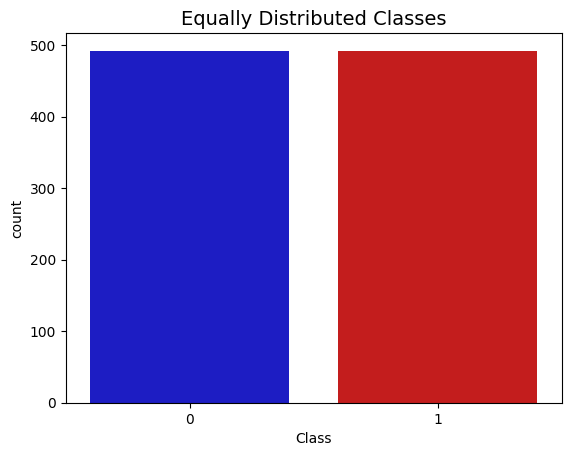

In [14]:
print('Distribution of te Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))



sns.countplot(x='Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

# **Correlation Matrices**



Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.

# Summary and Explanation:

* Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.
* Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.
* BoxPlots: We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.

Note: We have to make sure we use the subsample in our correlation matrix or else our correlation matrix will be affected by the high imbalance between our classes. This occurs due to the high class imbalance in the original dataframe.

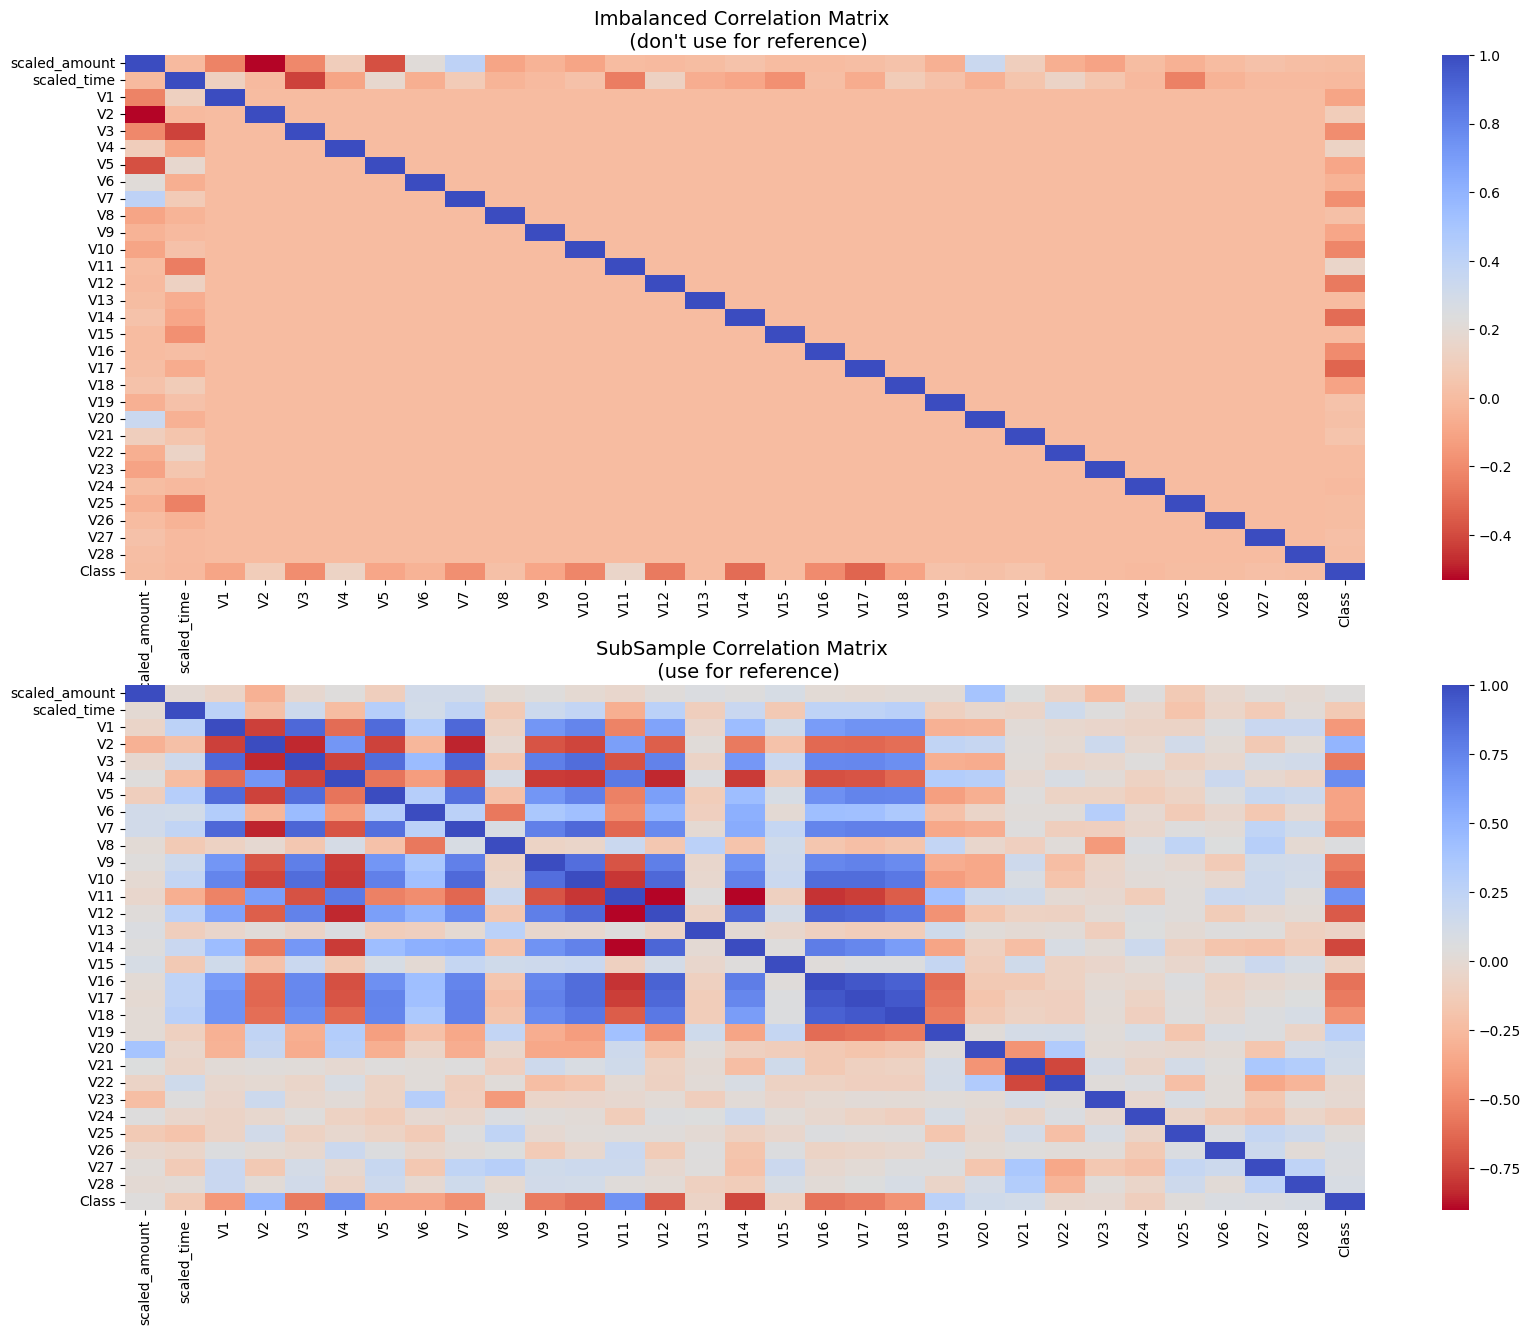

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [15]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 15))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size': 10}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

# Subsample DataFrame
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size': 10}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)

plt.show()
import IPython.display as display
display.display(plt.gcf())  # Forces rendering of the current figure



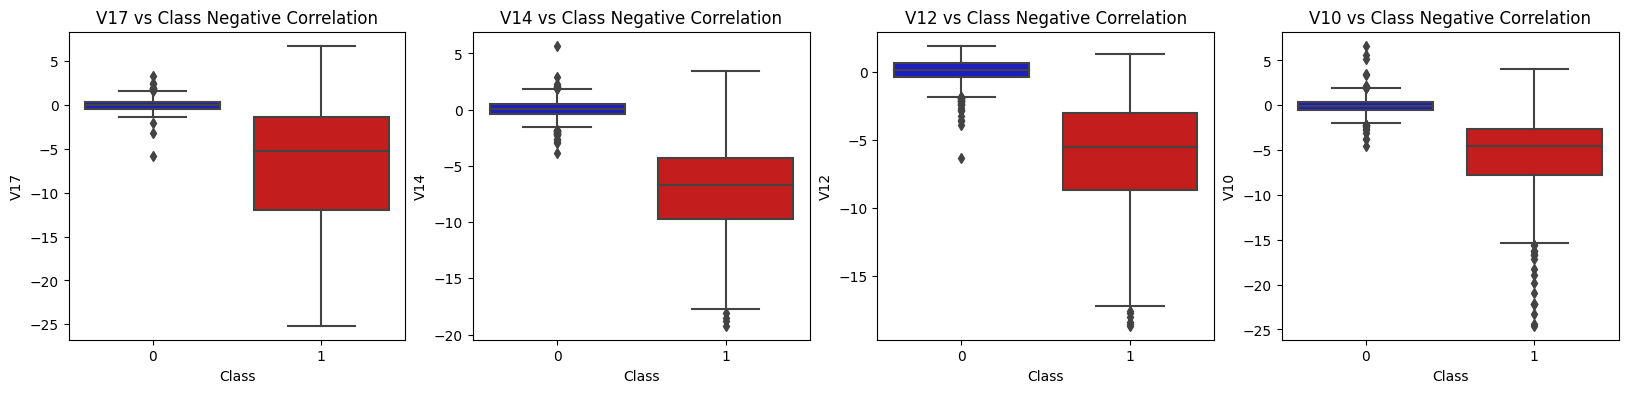

In [16]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transation)
sns.boxplot(x='Class', y='V17', data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x='Class', y='V14', data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x='Class', y='V12', data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x='Class', y='V10', data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

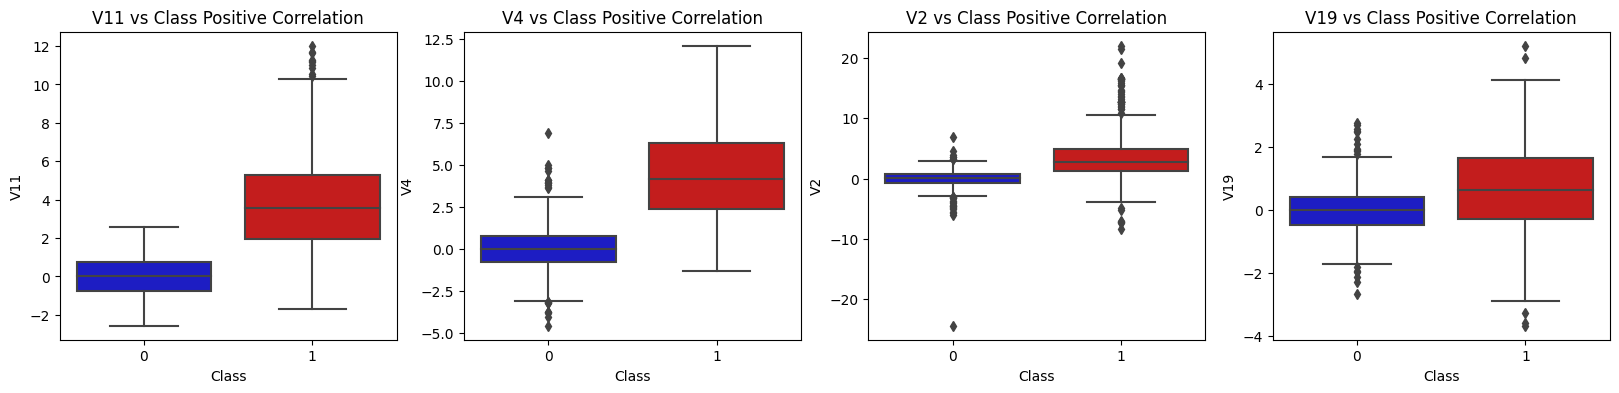

In [17]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

# **Anomaly Detection:**

Our main aim in this section is to remove "extreme outliers" from features that have a high correlation with our classes. This will have a positive impact on the accuracy of our models.

# Interquartile Range Method:

* Interquartile Range (IQR): We calculate this by the difference between the 75th percentile and 25th percentile. Our aim is to create a threshold beyond the 75th and 25th percentile that in case some instance pass this threshold the instance will be deleted.
* Boxplots: Besides easily seeing the 25th and 75th percentiles (both end of the squares) it is also easy to see extreme outliers (points beyond the lower and higher extreme).

# Outlier Removal Tradeoff:

We have to be careful as to how far do we want the threshold for removing outliers. We determine the threshold by multiplying a number (ex: 1.5) by the (Interquartile Range). The higher this threshold is, the less outliers will detect (multiplying by a higher number ex: 3), and the lower this threshold is the more outliers it will detect.

# Interquartile Range Method:

* Interquartile Range (IQR): We calculate this by the difference between the 75th percentile and 25th percentile. Our aim is to create a threshold beyond the 75th and 25th percentile that in case some instance pass this threshold the instance will be deleted.
* Boxplots: Besides easily seeing the 25th and 75th percentiles (both end of the squares) it is also easy to see extreme outliers (points beyond the lower and higher extreme).


**The Tradeoff:** The lower the threshold the more outliers it will remove however, we want to focus more on "extreme outliers" rather than just outliers. Why? because we might run the risk of information loss which will cause our models to have a lower accuracy. You can play with this threshold and see how it affects the accuracy of our classification models.

# **Summary:**

* Visualize Distributions: We first start by visualizing the distribution of the feature we are going to use to eliminate some of the outliers. V14 is the only feature that has a Gaussian distribution compared to features V12 and V10.
* Determining the threshold: After we decide which number we will use to multiply with the iqr (the lower more outliers removed), we will proceed in determining the upper and lower thresholds by substrating q25 - threshold (lower extreme threshold) and adding q75 + threshold (upper extreme threshold).
* Conditional Dropping: Lastly, we create a conditional dropping stating that if the "threshold" is exceeded in both extremes, the instances will be removed.
* Boxplot Representation: Visualize through the boxplot that the number of "extreme outliers" have been reduced to a considerable amount.

**Note**: After implementing outlier reduction our accuracy has been improved by over 3%! Some outliers can distort the accuracy of our models but remember, we have to avoid an extreme amount of information loss or else our model runs the risk of underfitting.

**Reference**: More information on Interquartile Range Method: How to Use Statistics to Identify Outliers in Data by Jason Brownless (Machine Learning Mastery blog)

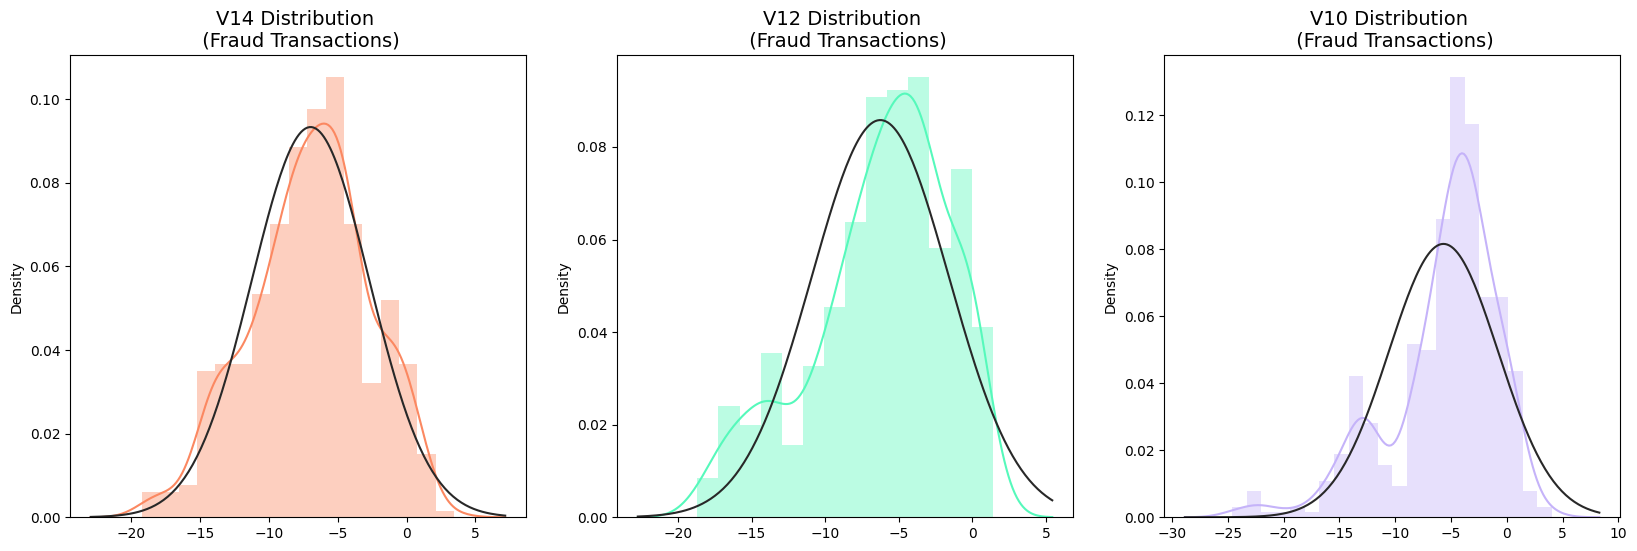

In [18]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [19]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-19.2143254902614, -18.0499976898594, -18.4937733551053, -18.8220867423816]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.0475965708216, -18.4311310279993, -18.5536970096458, -18.6837146333443]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 975
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-15.2399619587112, -24.403184

# **Checking reduction of Outliers in our labels**

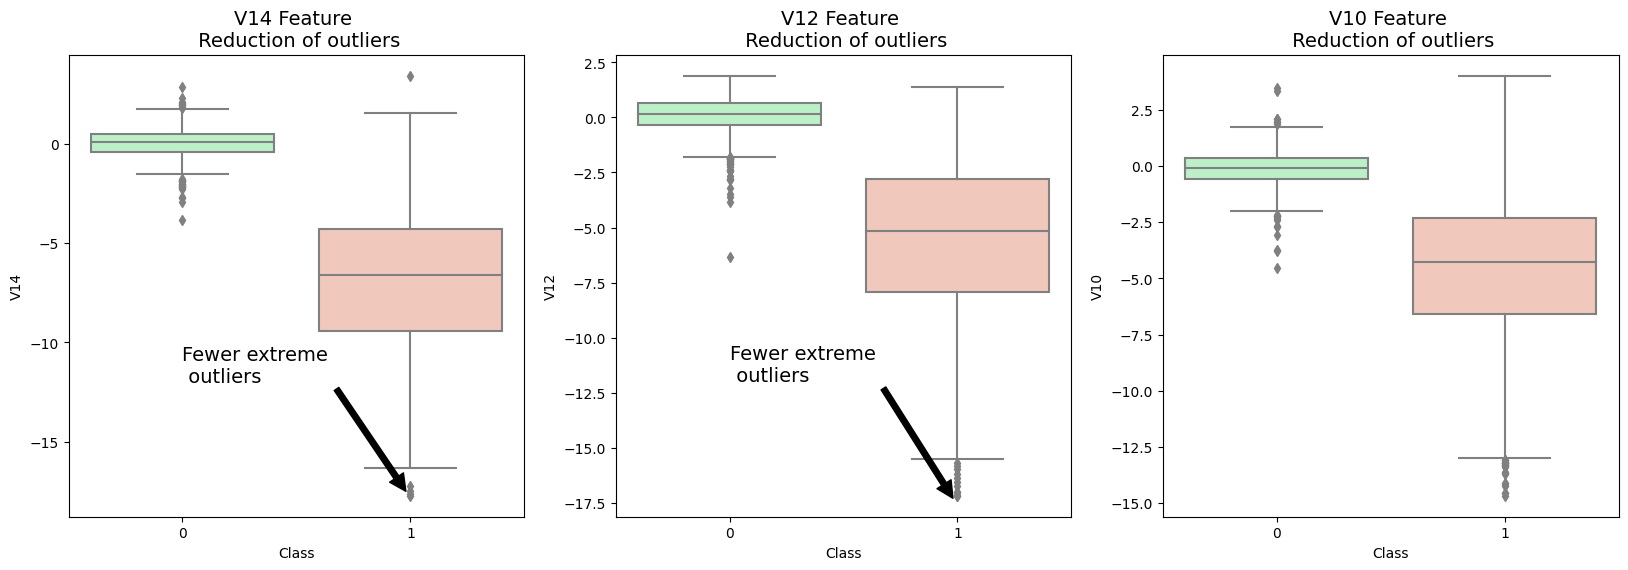

In [20]:
# The purpose of the code is to visualize the reduction of outliers in the V14 feature after removing extreme values (outliers). 
# It uses boxplots to compare the distribution of the V14 feature before and after outlier removal, focusing on fraudulent and non-fraudulent classes. 
# The annotation helps to highlight that there are fewer extreme outliers after the data cleaning process.

f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

**Why these values were chosen:**

**x-coordinate = 0.98:**
* The x-axis represents the classes, so 0.98 is close to 1 (fraud class). The annotation is meant to highlight the reduction of outliers for the fraud cases, so positioning the arrow near 1 directs attention to that part of the boxplot.

**y-coordinate = -17.5:**
* The y-axis corresponds to the values of V14. In the original dataset, V14 had outliers in this range (around -17.5). By choosing this value, the annotation points exactly to the region where those extreme outliers existed, emphasizing that they have been removed.

**xy=(0.98, -17.5):** 

This specifies the exact point on the plot where the arrow should point (the tip of the arrow).

**xytext=(0, -12):**

This specifies the location of the text relative to the plot. This is where the annotation text ("Fewer extreme outliers") will appear.

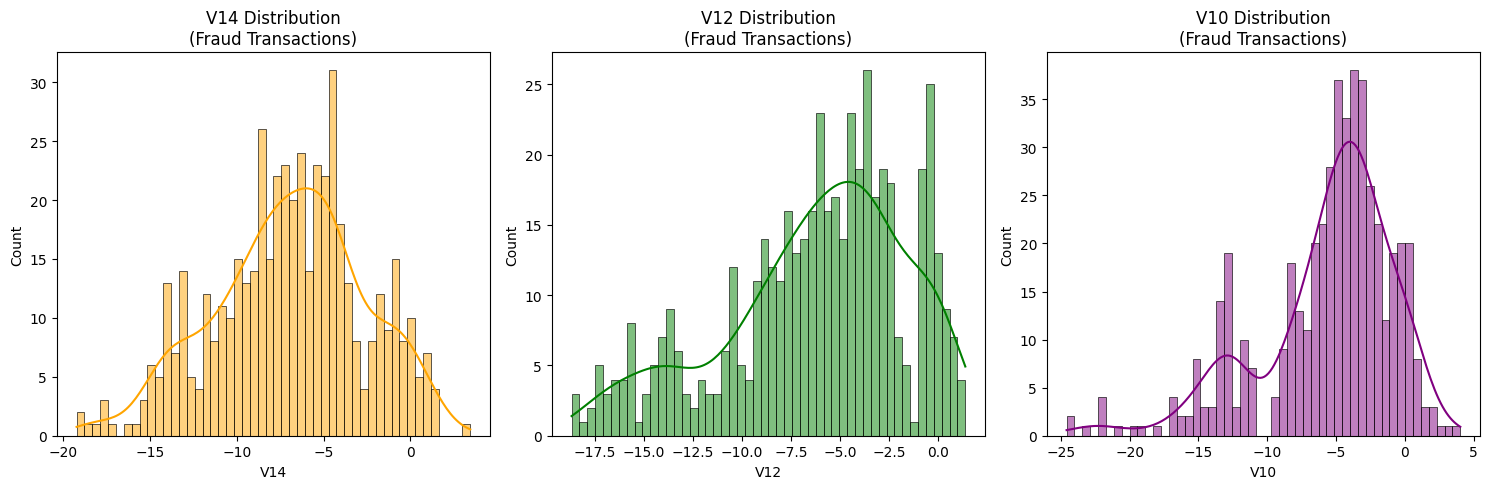

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size and styling
plt.figure(figsize=(15, 5))

# Plotting V14 Distribution
plt.subplot(1, 3, 1)
sns.histplot(df[df['Class'] == 1]['V14'], bins=50, kde=True, color='orange')
plt.title('V14 Distribution\n(Fraud Transactions)')

# Plotting V12 Distribution
plt.subplot(1, 3, 2)
sns.histplot(df[df['Class'] == 1]['V12'], bins=50, kde=True, color='green')
plt.title('V12 Distribution\n(Fraud Transactions)')

# Plotting V10 Distribution
plt.subplot(1, 3, 3)
sns.histplot(df[df['Class'] == 1]['V10'], bins=50, kde=True, color='purple')
plt.title('V10 Distribution\n(Fraud Transactions)')

plt.tight_layout()
plt.show()


# Dimensionality Reduction and Clustering:

**TSNE (t-distributed Stochastic Neighbor Embedding)** is a dimensionality reduction technique used to visualize high-dimensional data in 2 or 3 dimensions.

When you use TSNE from sklearn.manifold, you're aiming to project complex data (like your PCA-transformed credit card fraud detection dataset) into a lower-dimensional space to help visualize clusters or separations (e.g., fraud vs. non-fraud) that might not be easily visible in the original data.

For example, it helps in:

Visualizing relationships between fraud and non-fraud transactions in 2D or 3D.
Understanding feature separability after applying PCA transformation.

**In order to understand this algorithm you have to understand the following terms:**
* Euclidean Distance
* Conditional Probability
* Normal and T-Distribution Plots

**Note**: If you want a simple instructive video look at StatQuest: t-SNE, Clearly Explained by Joshua Starmer

**Summary:**

* t-SNE algorithm can pretty accurately cluster the cases that were fraud and non-fraud in our dataset.
* Although the subsample is pretty small, the t-SNE algorithm is able to detect clusters pretty accurately in every scenario (I shuffle the dataset before running t-SNE)
* This gives us an indication that further predictive models will perform pretty well in separating fraud cases from non-fraud cases.

In [22]:
# new_df is from the random undersample data ( fewer instances )
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print('T-SNE took {:.2} s'.format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print('PCA took {:.2} s'.format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 4.6 s
PCA took 0.042 s
Truncated SVD took 0.0069 s


<table>
  <tr>
    <th>Technique</th>
    <th>Description</th>
  </tr>
  <tr>
    <td><strong>t-SNE</strong></td>
    <td>Non-linear method, effective for visualizing clusters and separation in a highly reduced dimension.</td>
  </tr>
  <tr>
    <td><strong>PCA</strong></td>
    <td>Linear method that preserves as much variance as possible, helpful in finding the main patterns in data.</td>
  </tr>
  <tr>
    <td><strong>Truncated SVD</strong></td>
    <td>Another linear technique, optimized for sparse data, providing a different perspective on how clusters appear.</td>
  </tr>
</table>


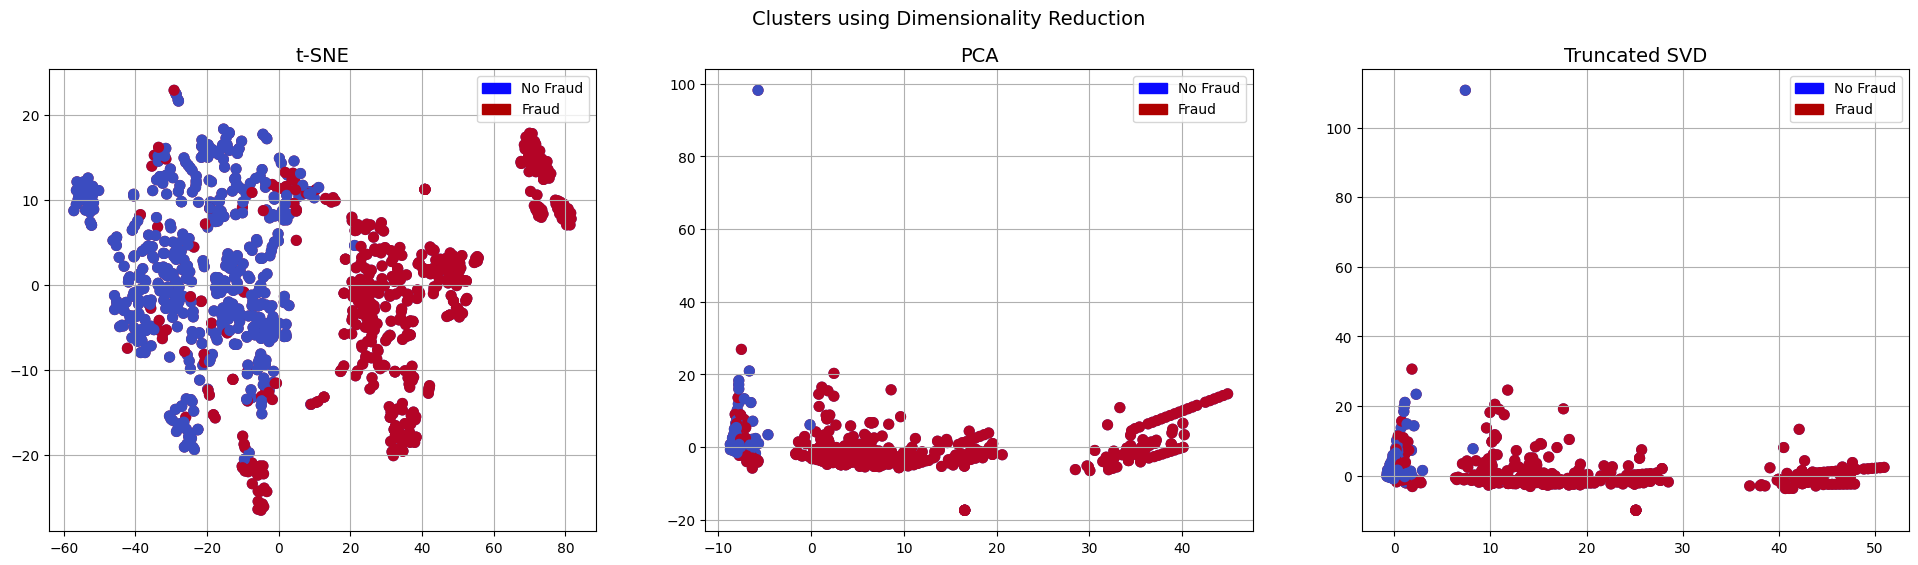

In [23]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud') # class 0 (No Fraud) or class 1 (Fraud)
red_patch = mpatches.Patch(color='#AF0000', label='Fraud') # Adds the blue and red legend to represent non-fraud fraud and.


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

**If you didnt understand the purpose of the above code: pls, look at this brief explanation**

**Subsample Dataset:**

You’re working with a balanced subsample of the original dataset (equal parts fraud and non-fraud) to help visualize fraud detection patterns more clearly.
This subset is already scaled, likely using PCA or another scaling technique on the original dataset.

**Applying Dimensionality Reduction:**

Although PCA was applied for scaling, it was on the full, high-dimensional data. Now, we’re applying t-SNE, PCA, and Truncated SVD on the subsample to reduce the data to 2 dimensions (x and y).
The purpose here is to see if fraud and non-fraud cases form distinct clusters or separate groups in 2D space.

**Visualization in 2D:**

* By reducing the high-dimensional data to 2D, these techniques enable us to visualize the data points on a scatter plot.
* This makes it easier to understand if fraud and non-fraud cases cluster differently or segregate naturally when reduced to two dimensions, giving insights into whether they have distinct patterns or overlap.

**Why This Matters**

* Better Clustering and Separation: Visualizing clusters helps assess if fraud cases have unique patterns in the dataset, which can be valuable for building models.
* Comparison Across Techniques: Each technique (t-SNE, PCA, Truncated SVD) has a different approach to dimensionality reduction, so comparing them helps determine which technique provides the clearest distinction between fraud and non-fraud.
* In essence, you’re using these techniques to visualize the separability of fraud vs. non-fraud in 2D, based on the patterns found in the high-dimensional subsample dataset.

# Classifiers (UnderSampling):

In this section we will train four types of classifiers and decide which classifier will be more effective in detecting fraud transactions. Before we have to split our data into training and testing sets and separate the features from the labels.

# Summary:

* Logistic Regression classifier is more accurate than the other three classifiers in most cases. (We will further analyze Logistic Regression)
* GridSearchCV is used to determine the paremeters that gives the best predictive score for the classifiers.
* Logistic Regression has the best Receiving Operating Characteristic score (ROC), meaning that LogisticRegression pretty accurately separates fraud and non-fraud transactions.

# Learning Curves:

* The wider the gap between the training score and the cross validation score, the more likely your model is overfitting (high variance).
* If the score is low in both training and cross-validation sets this is an indication that our model is underfitting (high bias)
* Logistic Regression Classifier shows the best score in both training and cross-validating sets.

In [24]:
# Undersampling before cross validating (prone to Overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [25]:
# Our data is already scaled we should split our traing and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Turn the values into an array for feeding the classification algorithems.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [27]:
# Lets implement simple classifiers

classifiers = {
    'LogisticRegression': LogisticRegression(),
    'KNearest': KNeighborsClassifier(),
    'Support Vector Classfier': SVC(),
    'DecisionTreeClassfier': DecisionTreeClassifier()
}

In [28]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")


Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 92.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score


In [29]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [30]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.92%
Knears Neighbors Cross Validation Score 92.33%
Support Vector Classifier Cross Validation Score 93.52%
DecisionTree Classifier Cross Validation Score 91.14%


In [31]:
# We will undersample during cross validating
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [ 56959  56960  56961 ... 284804 284805 284806] Test: [    0     1     2 ... 57533 58337 58648]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56959  56960  56961 ... 113921 113922 115174]
Train: [     0      1      2 ... 284804 284805 284806] Test: [113923 113924 113925 ... 171348 171548 172083]
Train: [     0      1      2 ... 284804 284805 284806] Test: [170882 170883 170884 ... 227843 228686 229132]
Train: [     0      1      2 ... 227843 228686 229132] Test: [227844 227845 227846 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


# **Understanding the above Code Snippet**

<table>
  <tr>
    <th>Step</th>
    <th>Code Snippet</th>
    <th>Description & Purpose</th>
    <th>Relevance to Dataset</th>
  </tr>

  <tr>
    <td>1. Data Preparation</td>
    <td><code>
      undersample_X = df.drop('Class', axis=1)<br>
      undersample_y = df['Class']
    </code></td>
    <td>Separates features and labels by dropping the target column <code>'Class'</code> to create <code>undersample_X</code> (features) and storing the target values in <code>undersample_y</code>.</td>
    <td>Sets up data for undersampling by isolating the labels (fraud and non-fraud) for use with NearMiss, a sampling method commonly applied to handle class imbalance.</td>
  </tr>

  <tr>
    <td>2. Splitting Data for Cross-Validation</td>
    <td><code>
      for train_index, test_index in sss.split(undersample_X, undersample_y):<br>
      undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]<br>
      undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    </code></td>
    <td>Uses <code>StratifiedShuffleSplit</code> (<code>sss</code>) to split the data into balanced train and test subsets by stratifying on <code>undersample_y</code>. This ensures each fold in cross-validation has the same ratio of fraud to non-fraud cases.</td>
    <td>This approach helps balance the train and test sets, ensuring the model is evaluated on data with realistic fraud-to-non-fraud proportions. Stratified splits provide better generalization on imbalanced datasets.</td>
  </tr>

  <tr>
    <td>3. Applying NearMiss for Undersampling</td>
    <td><code>
      X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)<br>
      print('NearMiss Label Distribution:', Counter(y_nearmiss))
    </code></td>
    <td>Applies <code>NearMiss</code>, an undersampling technique that reduces the majority class by selecting samples close to the minority class samples. The distribution of labels is printed to verify balance.</td>
    <td>NearMiss helps reduce class imbalance by removing majority class samples (non-fraud), making the dataset balanced for training and increasing the model's sensitivity to fraud cases.</td>
  </tr>

  <tr>
    <td>4. Cross-Validation with Undersampling Pipeline</td>
    <td><code>
      undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg)<br>
      undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])<br>
      undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    </code></td>
    <td>Builds a pipeline with NearMiss and logistic regression (<code>log_reg</code>) so that undersampling happens in each cross-validation fold. Trains the model on the undersampled data and makes predictions.</td>
    <td>Ensures that NearMiss is applied within each fold, which prevents data leakage and keeps the training and test sets balanced during each training phase. This results in better fraud detection sensitivity.</td>
  </tr>

  <tr>
    <td>5. Performance Evaluation</td>
    <td><code>
      undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))<br>
      undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))<br>
      undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))<br>
      undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))<br>
      undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))
    </code></td>
    <td>Calculates and stores metrics for each fold: accuracy, precision, recall, F1-score, and AUC-ROC. These metrics provide a comprehensive view of the model's performance in detecting fraud.</td>
    <td>Evaluation on original data ensures that metrics reflect the model’s real-world performance on imbalanced data, making it valuable for fraud detection.</td>
  </tr>
</table>


# **A Basic Difference between Random & Under Samplings:**

<table>
  <tr>
    <th>Sampling Technique</th>
    <th>Description</th>
    <th>Advantages</th>
    <th>Disadvantages</th>
    <th>Common Use Cases</th>
  </tr>
  
  <tr>
    <td><strong>Random Oversampling</strong></td>
    <td>Increases the size of the <strong>minority class</strong> by adding duplicate or synthetic samples to match the majority class size. This makes both classes have similar amounts of data points, helping balance the dataset.</td>
    <td>
      <ul>
        <li>Retains all existing data points, including those in the minority class.</li>
        <li>Effective when dealing with smaller datasets.</li>
        <li>Can improve model performance on minority class predictions.</li>
      </ul>
    </td>
    <td>
      <ul>
        <li>Can lead to <strong>overfitting</strong> on the minority class due to repeated samples.</li>
        <li>Increases dataset size, potentially increasing training time.</li>
      </ul>
    </td>
    <td>
      <ul>
        <li>Useful when you have a <strong>small dataset</strong> and want to retain all data points.</li>
        <li>Common in <strong>fraud detection, medical diagnoses,</strong> and other cases with limited minority samples.</li>
      </ul>
    </td>
  </tr>

  <tr>
    <td><strong>Random Undersampling</strong></td>
    <td>Reduces the size of the <strong>majority class</strong> by randomly removing samples to match the minority class size. This helps balance the dataset without adding synthetic data.</td>
    <td>
      <ul>
        <li>Reduces dataset size, resulting in faster model training.</li>
        <li>Doesn't introduce synthetic data, so data remains original.</li>
        <li>Reduces memory usage, making it suitable for large datasets.</li>
      </ul>
    </td>
    <td>
      <ul>
        <li>Can lead to <strong>loss of valuable information</strong> from the majority class.</li>
        <li>Risk of creating a biased model if important data points are removed.</li>
      </ul>
    </td>
    <td>
      <ul>
        <li>Effective for <strong>large datasets</strong> where removing majority samples won’t lead to significant data loss.</li>
        <li>Common in <strong>customer churn, marketing</strong> data, or any dataset with abundant majority class instances.</li>
      </ul>
    </td>
  </tr>
</table>


In [32]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<table border="1" cellpadding="10" cellspacing="0">
  <thead>
    <tr>
      <th>Learning Curve Observation</th>
      <th>Possible Issue</th>
      <th>Next Steps</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>High training score, low validation score, large gap</td>
      <td>Overfitting (High Variance)</td>
      <td>Regularization, simplify model, drop irrelevant features, increase data</td>
    </tr>
    <tr>
      <td>Low training and validation scores, small gap</td>
      <td>Underfitting (High Bias)</td>
      <td>Increase model complexity, add features, hyperparameter tuning</td>
    </tr>
    <tr>
      <td>Training and validation scores close, high performance</td>
      <td>Optimal Model</td>
      <td>Hyperparameter tuning, add more data</td>
    </tr>
    <tr>
      <td>Fluctuating scores, high variance</td>
      <td>Data quality issue</td>
      <td>Handle noisy data, more data, cross-validation</td>
    </tr>
  </tbody>
</table>


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

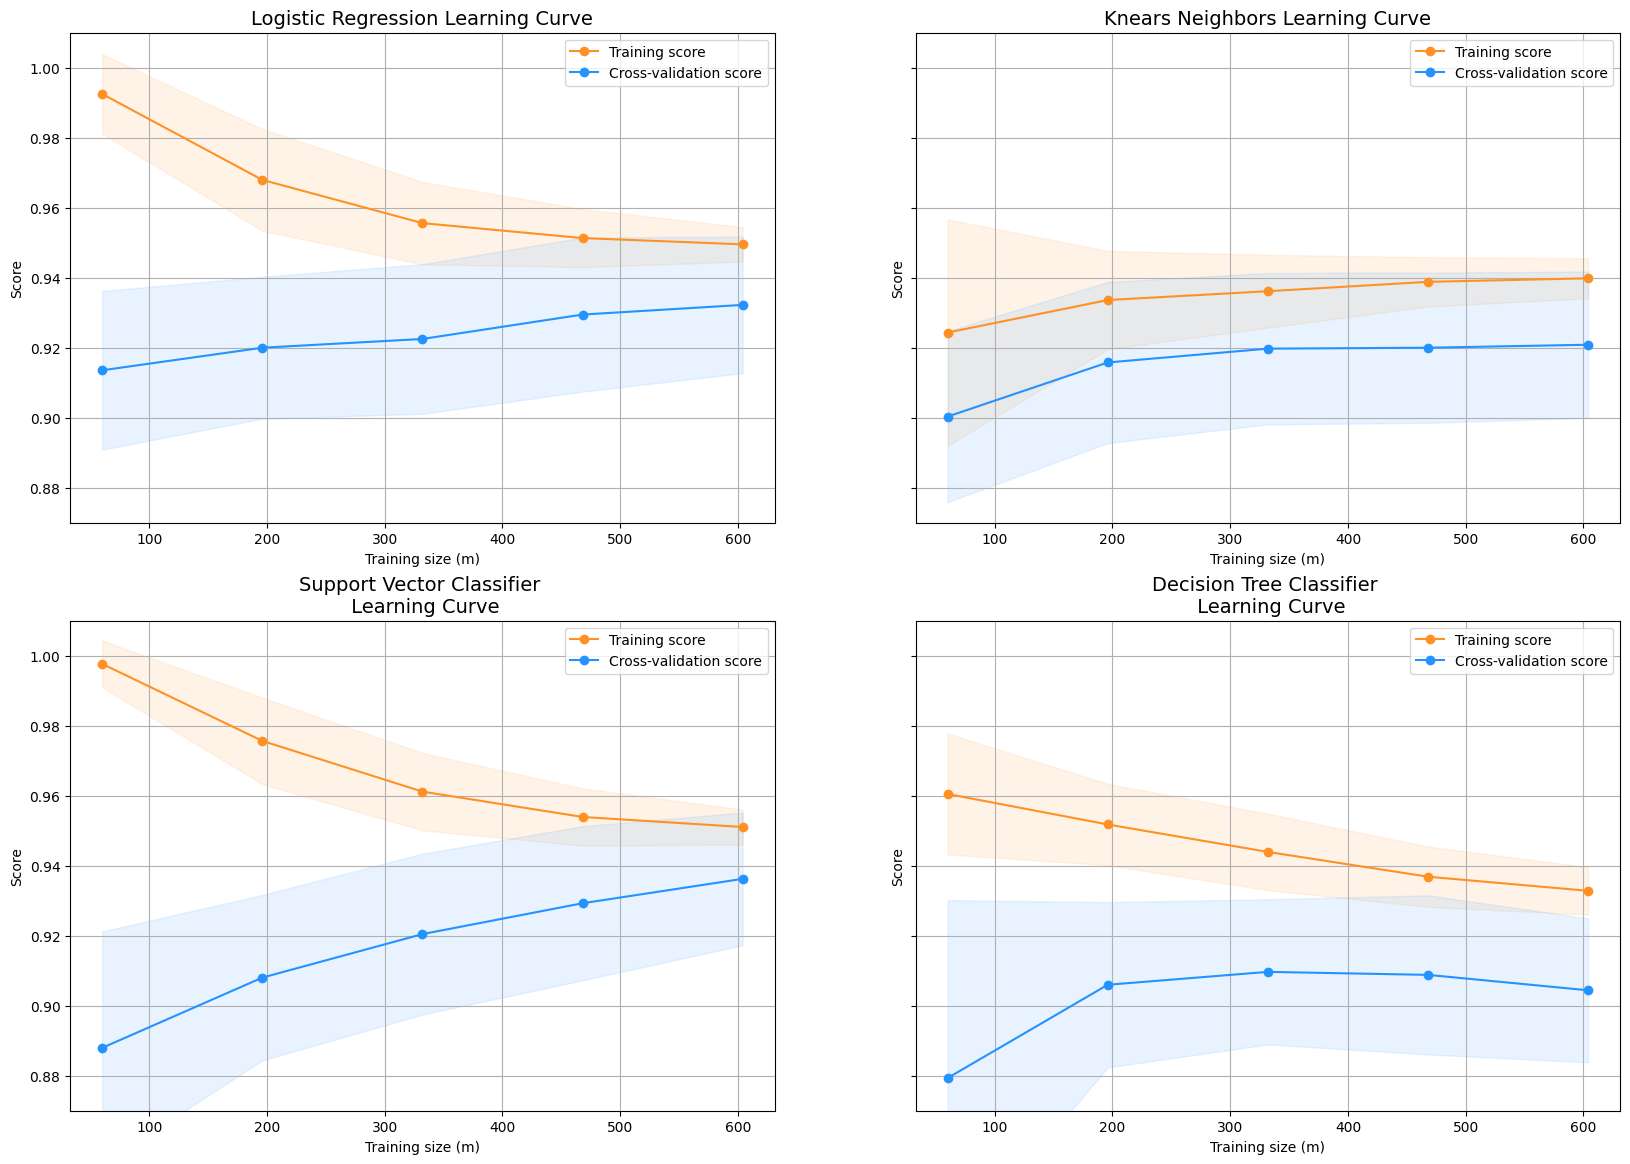

In [33]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)


# **General Observations:**
* Overfitting: When the training score is much higher than the validation score, the model is overfitting. This means it performs well on the training data but struggles to generalize to unseen data.

* Underfitting: When both the training and validation scores are low and close together, the model is not learning enough from the data, indicating underfitting.

* Model Complexity: These curves help in diagnosing whether a model is too simple (underfitting) or too complex (overfitting). For example, a high-capacity model might overfit small datasets but perform better as more data is added.

In [34]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5, method='decision_function')

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5, method='decision_function')

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [35]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9692410026606918
KNears Neighbors:  0.9220137235681276
Support Vector Classifier:  0.9697101246324044
Decision Tree Classifier:  0.9110278672454838


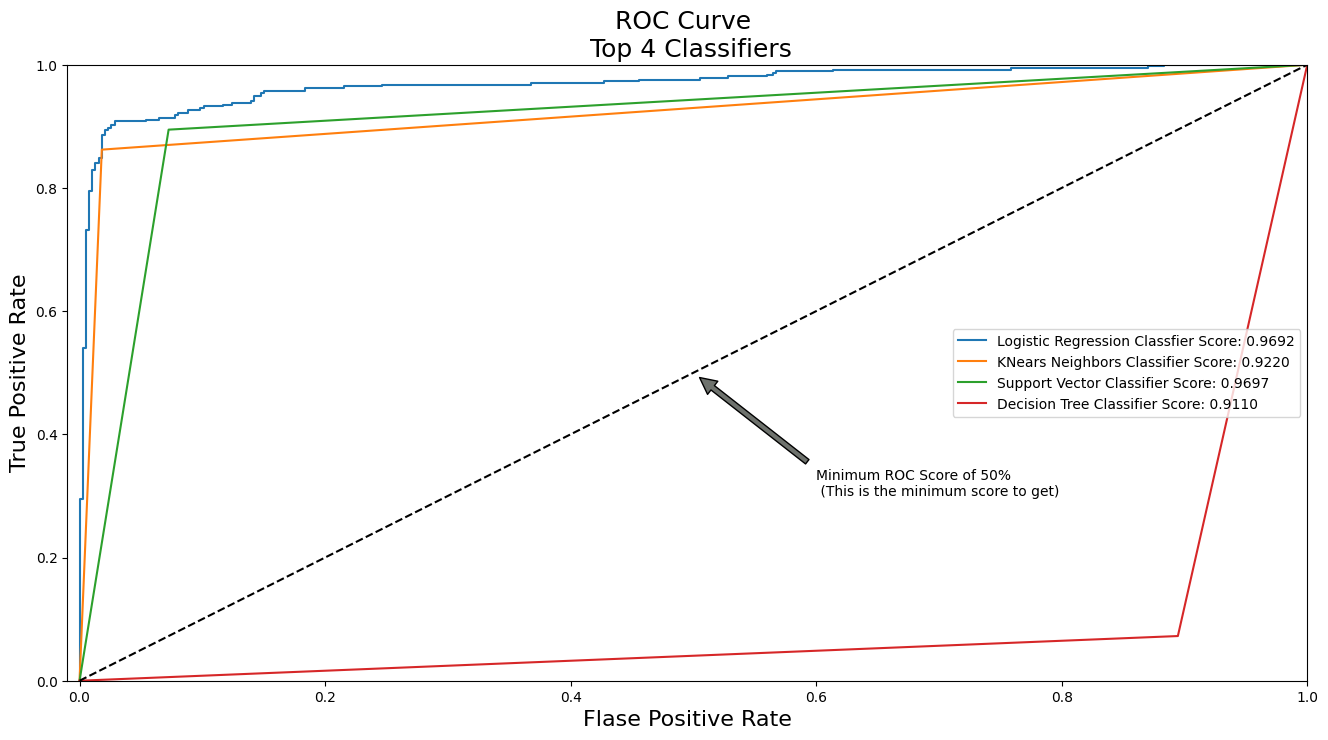

In [36]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_thresold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_thresold = roc_curve(y_train, tree_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_tpr, tree_fpr):
    plt.figure(figsize=(16, 8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classfier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('Flase Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3), arrowprops=dict(facecolor='#6E726D', shrink=0.05),)
    plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

# **A Deeper Look into LogisticRegression:**


In this section we will ive a deeper look into the logistic regression classifier.

# Terms:

* True Positives: Correctly Classified Fraud Transactions
* False Positives: Incorrectly Classified Fraud Transactions
* True Negative: Correctly Classified Non-Fraud Transactions
* False Negative: Incorrectly Classified Non-Fraud Transactions
* Precision: True Positives/(True Positives + False Positives)
* Recall: True Positives/(True Positives + False Negatives)


# Game Changer of Classification Metrics for Credit Card Fraud Detection

In credit card fraud detection, understanding **Precision** and **Recall** is essential to optimize model performance. Balancing these metrics through the **precision-recall tradeoff** is key to maximizing the detection of fraudulent transactions while minimizing false alarms. 

---

## 1. Understanding Precision and Recall

### Precision
- **Definition**: Precision is the proportion of true positive predictions out of all the positive predictions made by the model.
- **In Fraud Detection**: Of all the transactions the model flagged as fraud, how many were actually fraud?
- **Formula**:
  \[
  \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
  \]
- **Interpretation**: A high precision score indicates that the model is very accurate when it says a transaction is fraud. Few non-fraud transactions are misclassified as fraud.
    - **Example**: If a model has a precision of 95%, this means that out of all flagged fraud cases, 95% are indeed fraud, and 5% are non-fraud that were mistakenly flagged.

### Recall
- **Definition**: Recall is the proportion of true positive predictions out of all actual positive cases in the dataset.
- **In Fraud Detection**: Of all the actual fraud transactions, how many did the model successfully detect?
- **Formula**:
  \[
  \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
  \]
- **Interpretation**: A high recall score indicates that the model is good at catching most of the actual fraud cases, though it may not be as selective.
    - **Example**: If a model has a recall of 90%, it successfully detects 90% of all actual fraud cases but misses the remaining 10%.

---

## 2. Precision-Recall Tradeoff

The **precision-recall tradeoff** represents the balancing act between precision and recall. Improving one can often reduce the other, so understanding when to prioritize each metric is important.

### Why There’s a Tradeoff
- **Increasing Precision**: The model becomes more selective and labels transactions as fraud only if it’s very confident. This **reduces false positives** but may miss actual fraud cases, thereby **lowering recall**.
- **Increasing Recall**: The model is more lenient and catches more fraud cases (fewer false negatives). However, this also **increases false positives**, meaning precision may decrease.

### Example
Suppose we have 100 transactions:
- **10 of them are actual fraud cases**.
- The model identifies **8 fraud cases correctly (true positives)** but misclassifies **5 non-fraud cases as fraud (false positives)**.

#### Calculating Precision and Recall:
- **Precision** = \( \frac{8}{8 + 5} = 0.62 \) or **62%**. Out of all transactions labeled as fraud, 62% are actual fraud.
- **Recall** = \( \frac{8}{8 + 2} = 0.80 \) or **80%**. Out of all actual fraud transactions, 80% were detected.

If the model becomes more **selective to improve precision**:
- **New Precision**: Suppose precision increases to 90% (higher confidence in flagged cases),
- **New Recall**: Recall may decrease to 50% (fewer fraud cases detected).

---

## 3. When to Prioritize Precision or Recall

The choice between precision and recall depends on the **consequences of errors** in the specific application.

- **High Precision (Fewer False Positives)**: Useful when false positives are costly.
  - **Example**: Fraud detection in high-value transactions, where falsely flagging non-fraud as fraud may disrupt legitimate transactions.
  - **Goal**: Ensure flagged cases are highly likely to be actual fraud.

- **High Recall (Fewer False Negatives)**: Useful when missing true positives (fraud cases) is more costly than mistakenly flagging non-fraud cases.
  - **Example**: Fraud detection in general credit card usage, where detecting as much fraud as possible is a priority, even if some non-fraud cases are flagged.
  - **Goal**: Catch as many fraud cases as possible, even if it means more false positives.

---

## Summary
- **Precision**: Measures how accurate fraud predictions are among flagged cases.
- **Recall**: Measures how well the model catches actual fraud cases.
- **Tradeoff**: Increasing precision usually lowers recall and vice versa.
- **Choosing the Right Balance**: Depends on the application—prioritize precision when false positives are costly, prioritize recall when missing true positives (actual fraud) is riskier.

Understanding and balancing this tradeoff is essential in applications like fraud detection, where catching fraud is critical, but too many false alarms can disrupt normal transactions.
ives)

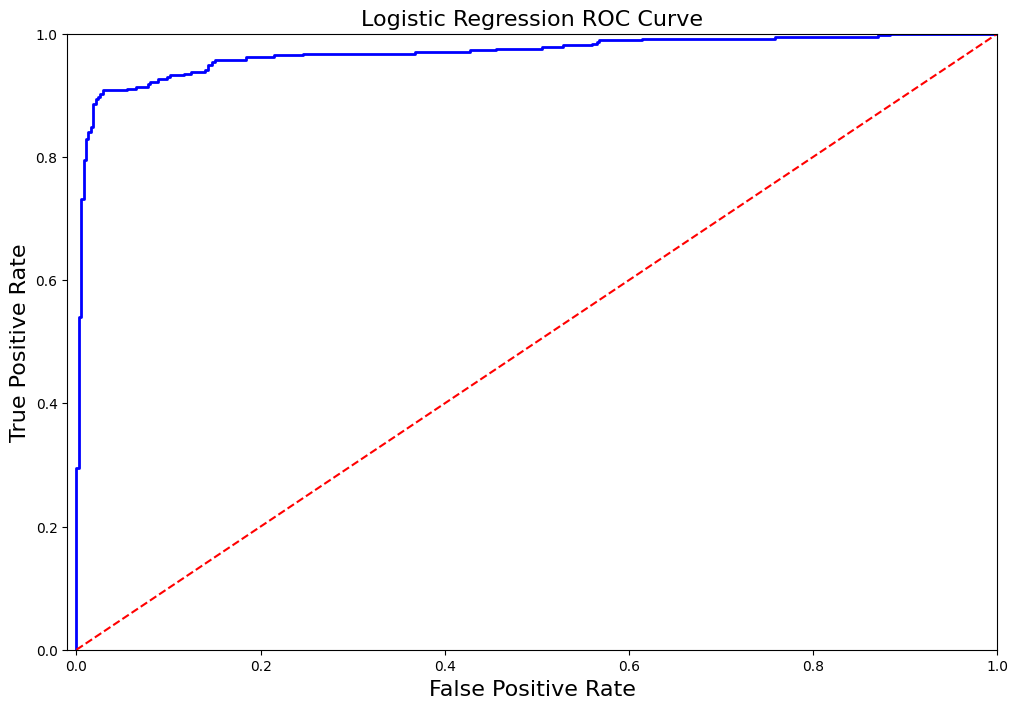

In [37]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

# Analyzing Overfitting and Generalization with Evaluation Metrics

In credit card fraud detection, understanding how a model performs on both training and unseen data is crucial to avoid overfitting. Overfitting happens when the model memorizes the training data rather than generalizing patterns that apply to new, unseen data. This section explains key concepts like overfitting, generalization, and the use of evaluation metrics such as Precision, Recall, F1 Score, and Accuracy.

---

## Key Concepts: Overfitting vs. Generalization

### 1. Overfitting
- **Definition**: Overfitting occurs when the model becomes too complex and learns not only the genuine patterns in the training data but also the noise or specific details of the dataset. As a result, the model performs well on the training set but fails to generalize to new data.
  
- **Implication in Fraud Detection**: In the context of fraud detection, an overfitted model might perfectly identify fraud in the training set but miss fraud in unseen transactions or flag too many false positives. It can lead to high accuracy on training data but poor results when faced with new or real-world examples.

### 2. Generalization
- **Definition**: Generalization refers to the model’s ability to identify patterns that apply not only to the training data but also to unseen data. A well-generalized model performs well on both training and test sets, meaning it can accurately detect fraud in new transactions.

- **In Fraud Detection**: A generalized model would learn meaningful patterns, such as transaction anomalies, without being biased toward the specific transactions in the training set. This allows it to detect new types of fraud, which is critical for real-world applications.

### Memorizing vs. Generalizing
- **Memorizing**: A model that memorizes the training data learns specific instances rather than general patterns. This leads to poor performance on any new data it encounters.
  
- **Generalizing**: A model that generalizes well captures the underlying trends that are likely to apply to both training data and unseen data. In fraud detection, this means identifying patterns like abnormal transaction amounts or geographic inconsistencies.

---

## Evaluation Metre negative) is very costly, such as allowing fraud to go unnoticed.

### 3. F1 Score
- **Definition**: The F1 score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall, especially useful in imbalanced datasets like fraud detection where both false positives and false negatives have serious consequences.

- **Formula**:
  \[
  \text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  \]

- **Interpretation**: The F1 score balances the need for both high precision and high recall, making it a good metric to evaluate fraud detection models, especially when neither metric can be sacrificed.

### 4. Accuracy
- **Definition**: Accuracy is the proportion of all correctly predicted transactions (both fraud and non-fraud) out of the total number of transactions.

- **Formula**:
  \[
  \text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total}}
  \]

- **Interpretation**: While accuracy is commonly used, it can be misleading in fraud detection due to the highly imbalanced nature of the data (with many more non-fraud than fraud cases). High accuracy may simply reflect the model's ability to predict non-fraud cases correctly, while missing most fraud cases.

---

## Identifying Overfitting with Metrics

### Overfitting Detection
When a model shows significantly higher performance on the training data compared to test or cross-validation data, it might be overfitting. Common signs of overfitting include:
- High **Recall**, **Precision**, and **F1** scores on training data but significantly lower scores on cross-validation or test data.
- High **Accuracy** on training data that does not reflect real-world performance, especially in imbalanced datasets like fraud detection.

### Generalization Check
To ensure the model generalizes well, we compare metrics obtained from cross-validation (such as undersampling results) with training metrics:
- If cross-validation scores (e.g., **Precision**, **Recall**, **F1**, **Accuracy**) are close to training scores, the model is likely to generalize well.
- Large gaps between training and cross-validation scores indicate that the model may be overfitting and not performing well on unseen data.

---

## Summary

- **Overfitting**: The model memorizes the training data, leading to poor performance on new data.
- **Generalization**: The model learns patterns that apply not only to the training data but also to new, unseen data.
- **Precision**: Measures how accurate the fraud predictions are.
- **Recall**: Measures how well the model captures all actual fraud cases.
- **F1 Score**: Balances both precision and recall, making it a critical metric for imbalanced datasets.
- **Accuracy**: Can be misleading in fraud detection due to class imbalance but still useful when interpreted with other metrics.

Balancing these metrics and ensuring that the model generalizes well is essential in building an effective fraud detection system.


In [38]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.91
Precision Score: 0.70
F1 Score: 0.79
Accuracy Score: 0.76
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.64
Precision Score: 0.00
Recall Score: 0.34
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


In [39]:
undersample_y_score = log_reg.decision_function(original_Xtest)

In [40]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.05


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.05')

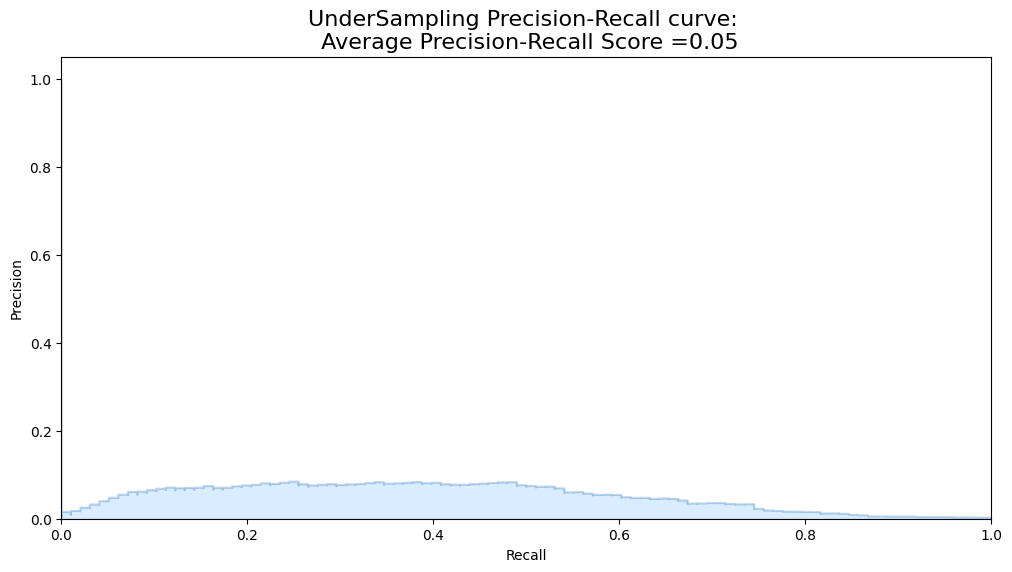

In [41]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

* In summary, this Precision-Recall curve demonstrates that the model trained using undersampling performs poorly in terms of precision and recall, with a very low average score of 0.03. This suggests a need to either adjust the undersampling method, improve model selection, or explore other techniques (such as oversampling or different classifiers) to better handle the imbalanced dataset.

# **SMOTE Technique (Over-Sampling):**
<img src="https://raw.githubusercontent.com/rikunert/SMOTE_visualisation/master/SMOTE_R_visualisation_3.png", width=800> SMOTE stands for Synthetic Minority Over-sampling Technique. Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems".

Understanding SMOTE:

* Solving the Class Imbalance: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.
* Location of the synthetic points: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.
* Final Effect: More information is retained since we didn't have to delete any rows unlike in random undersampling.
* Accuracy || Time Tradeoff: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.
ated.

# **Cross Validation Overfitting Mistake:**

# Overfitting during Cross Validation:

In our undersample analysis I want to show you a common mistake I made that I want to share with all of you. It is simple, if you want to undersample or oversample your data you should not do it before cross validating. Why because you will be directly influencing the validation set before implementing cross-validation causing a "data leakage" problem. In the following section you will see amazing precision and recall scores but in reality our data is overfitting!

# The wrong way:
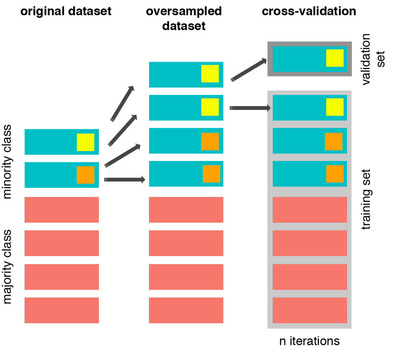

As mentioned previously, if we get the minority class ("Fraud) in our case, and create the synthetic points before cross validating we have a certain influence on the "validation set" of the cross validation process. Remember how cross validation works, let's assume we are splitting the data into 5 batches, 4/5 of the dataset will be the training set while 1/5 will be the validation set. The test set should not be touched! For that reason, we have to do the creation of synthetic datapoints "during" cross-validation and not before, just like below:

# The Right Way:
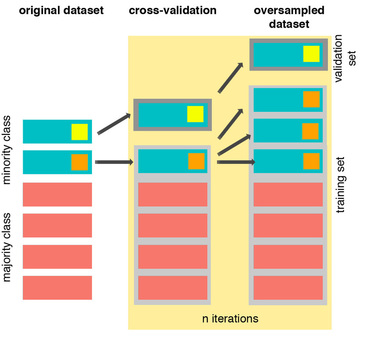

As you see above, SMOTE occurs "during" cross validation and not "prior" to the cross validation process. Synthetic data are created only for the training set without affecting the validation set.

References:
* DEALING WITH IMBALANCED DATA: UNDERSAMPLING, OVERSAMPLING AND PROPER CROSS-VALIDATION
* SMOTE explained for noobs
* Machine Learning - Over-& Undersampling - Python/ Scikit/ Scikit-Imblearnearn

In [42]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []


# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()


rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)


Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9699272327823854
precision: 0.06433682977934053
recall: 0.9111976630963973
f1: 0.11898180220398222
---------------------------------------------------------------------------------------------------------------------------------------


In [43]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.11      0.86      0.19        98

    accuracy                           0.99     56961
   macro avg       0.55      0.92      0.59     56961
weighted avg       1.00      0.99      0.99     56961



In [44]:
y_score = best_est.decision_function(original_Xtest)

In [45]:
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.74


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.74')

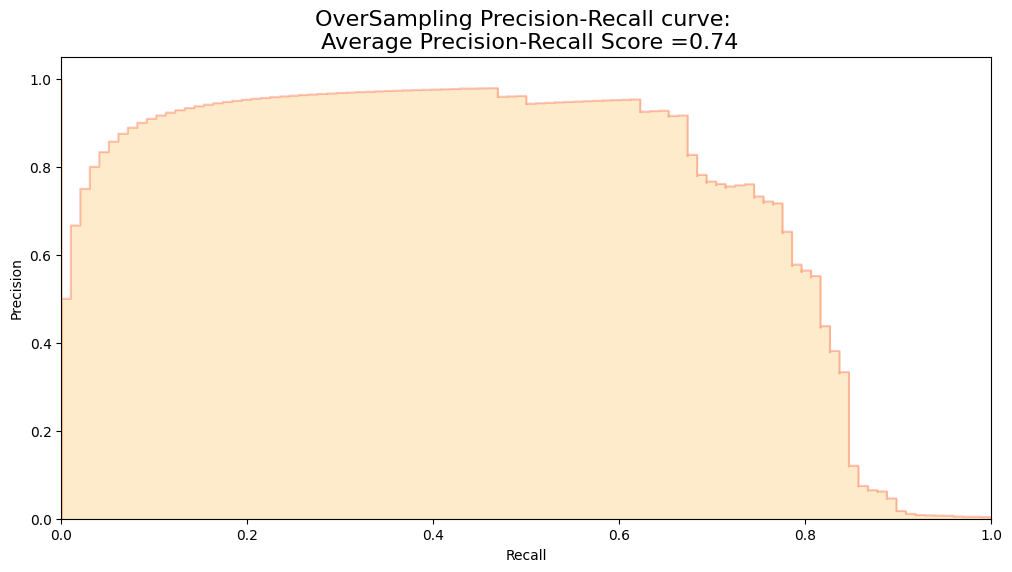

In [46]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [47]:
from imblearn.over_sampling import SMOTE

# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Apply SMOTE to the training data
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)


In [48]:
# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :4.4785871505737305 sec


# **Test Data with Logistic Regression:**

# Confusion Matrix:

Positive/Negative: Type of Class (label) ["No", "Yes"] True/False: Correctly or Incorrectly classified by the model.


True Negatives (Top-Left Square): This is the number of correctly classifications of the "No" (No Fraud Detected) class.


False Negatives (Top-Right Square): This is the number of incorrectly classifications of the "No"(No Fraud Detected) class.


False Positives (Bottom-Left Square): This is the number of incorrectly classifications of the "Yes" (Fraud Detected) class


True Positives (Bottom-Right Square): This is the number of correctly classifications of the "Yes" (Fraud Dete
ct

# Summary:
* Random UnderSampling: We will evaluate the final performance of the classification models in the random undersampling subset. Keep in mind that this is not the data from the original dataframe.
* Classification Models: The models that performed the best were logistic regression and support vector classifier (SVM)
classifier (SVM)

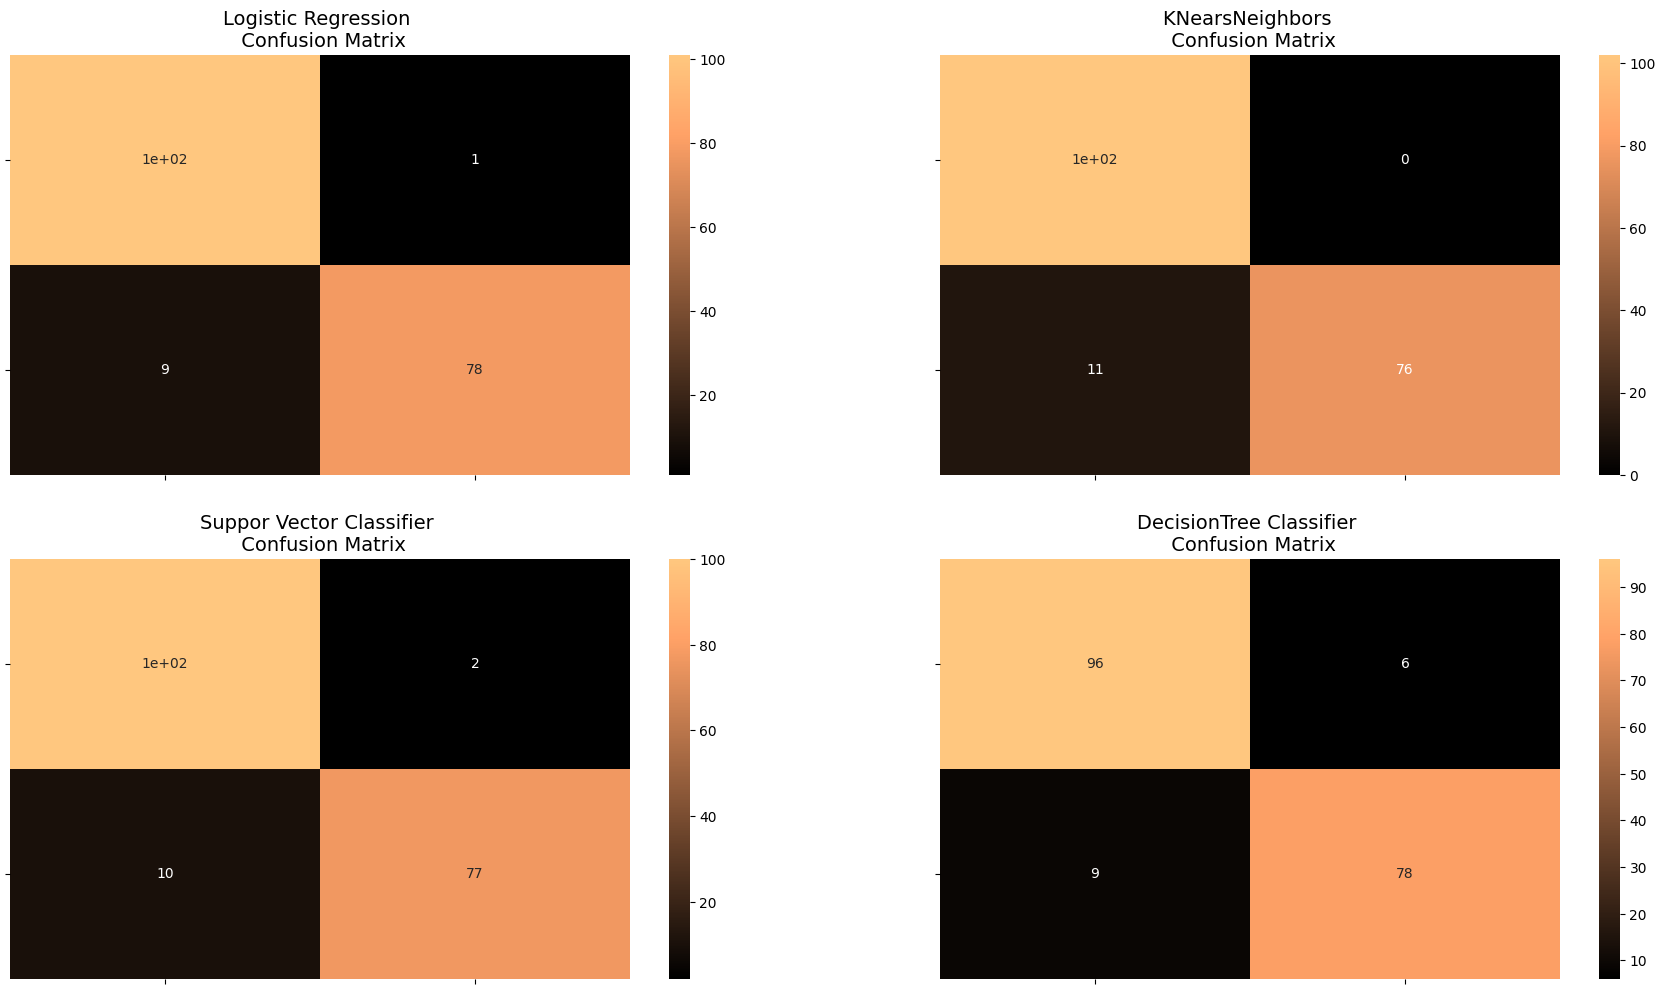

In [49]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [50]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       102
           1       0.99      0.90      0.94        87

    accuracy                           0.95       189
   macro avg       0.95      0.94      0.95       189
weighted avg       0.95      0.95      0.95       189

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       102
           1       1.00      0.87      0.93        87

    accuracy                           0.94       189
   macro avg       0.95      0.94      0.94       189
weighted avg       0.95      0.94      0.94       189

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       102
           1       0.97      0.89      0.93        87

    accuracy                           0.94       189
   macro avg       0.94      0.93      0.94       189
weighted

In [51]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)



# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Score
0,Random UnderSampling,0.947090
1,Oversampling (SMOTE),0.987781


# **Neural Networks Testing Random UnderSampling Data vs OverSampling (SMOTE):**

In this section we will implement a simple Neural Network (with one hidden layer) in order to see which of the two logistic regressions models we implemented in the (undersample or oversample(SMOTE)) has a better accuracy for detecting fraud and non-fraud transactions.

# Our Main Goal:

Our main goal is to explore how our simple neural network behaves in both the random undersample and oversample dataframes and see whether they can predict accuractely both non-fraud and fraud cases. Why not only focus on fraud? Imagine you were a cardholder and after you purchased an item your card gets blocked because the bank's algorithm thought your purchase was a fraud. That's why we shouldn't emphasize only in detecting fraud cases but we should also emphasize correctly categorizing non-fraud transactions.

---

# The Confusion Matrix:

Here is again, how the confusion matrix works:
* Upper Left Square ( True Negative - TN ): The amount of correctly classified by our model of no fraud transactions.
* Upper Right Square ( False Positive - FP ): The amount of incorrectly classified transactions as fraud cases, but the actual label is no fraud .
* Lower Left Square( False Negative - FN ): The amount of incorrectly classified transactions as no fraud cases, but the actual label is fraud .
* Lower Right Square ( True Positive - TP ): The amount of correctly classified by our model of fraud transactions.
t---

# Summary (Keras || Random UnderSampling):


* Dataset: In this final phase of testing we will fit this model in both the random undersampled subset and oversampled dataset (SMOTE) in order to predict the final result using the original dataframe testing data.
* Neural Network Structure: As stated previously, this will be a simple model composed of one input layer (where the number of nodes equals the number of features) plus bias node, one hidden layer with 32 nodes and one output node composed of two possible results 0 or 1 (No fraud or fraud).
* Other characteristics: The learning rate will be 0.001, the optimizer we will use is the AdamOptimizer, the activation function that is used in this scenario is "Relu" and for the final outputs we will use sparse categorical cross entropy, which gives the probability whether an instance case is no fraud or fraud (The prediction will pick the highest probability between the two.
o.)ions.



# NOTE: Installing Keras and Tensorflow New Versions 

In [52]:

# import keras
# from keras import backend as K
# from keras.models import Sequential
# from keras.layers import Activation
# from keras.layers import Dense
# from keras.optimizers import Adam
# # from keras.metrics import categorical_crossentropy

# n_inputs = X_train.shape[1]

# undersample_model = Sequential([
# Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
# ense(32, activation='relu'),
# Dense(2, activation='softmax')
#  ])



In [53]:
# The error ModuleNotFoundError: No module named 'keras.layers.core' is happening because keras.layers.core.Dense is no longer part of the standalone keras library in recent versions. Instead, the Dense layer can be imported directly from keras.layers or preferably from tensorflow.keras.layers, especially when using TensorFlow as the backend.

# -------------- After this we will get again error on internal issue with the TensorFlow installation, likely caused by version conflicts or corruption in the package dependencies.---------------- #

# So, pls Here are a few steps to help you resolve this issue:

# 1. Reinstall TensorFlow
# Since the error is related to TensorFlow's internal components, a clean reinstall of TensorFlow might help fix the issue. Run the following commands to uninstall and then reinstall TensorFlow:


# -----------------------------------pip uninstall tensorflow keras -y----------------------------
# -----------------------------------pip install tensorflow --upgrade-----------------------------

# 2. Restart the Kernel
# After reinstalling or changing the TensorFlow version, it's essential to restart the Kaggle notebook kernel. Go to the “Settings” tab in the notebook interface and click “Restart Session” or use the command:


# import os
# os._exit(00)


# 3. Import Layers from TensorFlow's Keras API
# Instead of using keras directly, use the following imports to avoid version mismatch issues:


# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Activation
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.metrics import categorical_crossentropy
# This will ensure that you are using the Keras package that is bundled with TensorFlow, reducing the likelihood of version conflicts.

<!-- The error ModuleNotFoundError: No module named 'keras.layers.core' is happening because keras.layers.core.Dense is no longer part of the standalone keras library in recent versions. Instead, the Dense layer can be imported directly from keras.layers or preferably from tensorflow.keras.layers, especially when using TensorFlow as the backend. -->

In [54]:
# pip uninstall tensorflow keras -y


In [55]:
# pip install tensorflow --upgrade

In [56]:
# import os
# os._exit(00)


In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy



In [58]:
n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [59]:
undersample_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,988 (7.77 KB)

 Trainable params: 1,988 (7.77 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# The argument lr is no longer recognized in the Adam optimizer. In newer versions of TensorFlow/Keras, the learning rate should be passed as learning_rate instead of lr.

# You can fix the issue by updating your Adam optimizer initialization like this:

In [61]:
undersample_model.compile(
    optimizer=Adam(learning_rate=0.001),  # use 'learning_rate' instead of 'lr'
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [62]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20


I0000 00:00:1728860766.087282     230 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1728860766.105503     230 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1728860767.271775     230 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 - 4s - 154ms/step - accuracy: 0.7136 - loss: 0.5638 - val_accuracy: 0.7961 - val_loss: 0.4548
Epoch 2/20
25/25 - 0s - 4ms/step - accuracy: 0.8742 - loss: 0.3297 - val_accuracy: 0.8947 - val_loss: 0.3250
Epoch 3/20
25/25 - 0s - 3ms/step - accuracy: 0.9139 - loss: 0.2700 - val_accuracy: 0.9211 - val_loss: 0.2659
Epoch 4/20
25/25 - 0s - 4ms/step - accuracy: 0.9189 - loss: 0.2353 - val_accuracy: 0.9408 - val_loss: 0.2316
Epoch 5/20
25/25 - 0s - 3ms/step - accuracy: 0.9255 - loss: 0.2095 - val_accuracy: 0.9539 - val_loss: 0.2049
Epoch 6/20
25/25 - 0s - 3ms/step - accuracy: 0.9272 - loss: 0.1916 - val_accuracy: 0.9605 - val_loss: 0.1878
Epoch 7/20
25/25 - 0s - 3ms/step - accuracy: 0.9288 - loss: 0.1875 - val_accuracy: 0.9605 - val_loss: 0.1730
Epoch 8/20
25/25 - 0s - 3ms/step - accuracy: 0.9321 - loss: 0.1700 - val_accuracy: 0.9539 - val_loss: 0.1652
Epoch 9/20
25/25 - 0s - 3ms/step - accuracy: 0.9338 - loss: 0.1610 - val_accuracy: 0.9605 - val_loss: 0.1488
Epoch 10/20
25/25 - 0s - 4ms

In [63]:
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [64]:
# The method predict_classes() has been deprecated in newer versions of Keras and is no longer available. Instead, you can use predict() and then convert the output to class labels.

# To fix the issue, replace predict_classes() with the following approach:

In [65]:
# Ensure predictions are made on the correct test data
undersample_fraud_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

# Convert predictions to binary
undersample_fraud_predictions = (undersample_fraud_predictions > 0.5).astype("int32").flatten()

In [66]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


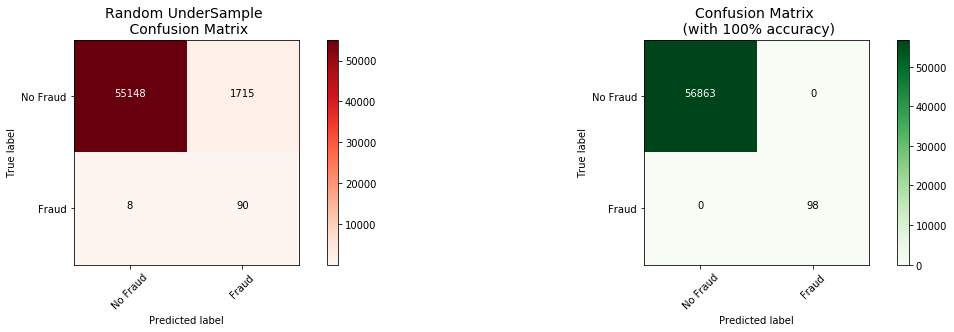

# **Keras || OverSampling (SMOTE):**

In [67]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [68]:
from tensorflow.keras.optimizers import Adam

# Update 'lr' to 'learning_rate'
oversample_model.compile(Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [69]:
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
1214/1214 - 6s - 5ms/step - accuracy: 0.9828 - loss: 0.0514 - val_accuracy: 0.9984 - val_loss: 0.0146
Epoch 2/20
1214/1214 - 2s - 2ms/step - accuracy: 0.9977 - loss: 0.0109 - val_accuracy: 0.9994 - val_loss: 0.0056
Epoch 3/20
1214/1214 - 2s - 2ms/step - accuracy: 0.9988 - loss: 0.0062 - val_accuracy: 0.9999 - val_loss: 0.0023
Epoch 4/20
1214/1214 - 2s - 2ms/step - accuracy: 0.9991 - loss: 0.0044 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 5/20
1214/1214 - 2s - 2ms/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 6/20
1214/1214 - 2s - 2ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.9994 - val_loss: 0.0044
Epoch 7/20
1214/1214 - 2s - 2ms/step - accuracy: 0.9996 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 8.6409e-04
Epoch 8/20
1214/1214 - 2s - 2ms/step - accuracy: 0.9996 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 9/20
1214/1214 - 2s - 2ms/step - accuracy: 0.9997 - loss: 0.0018 - val_accuracy: 1.000

In [70]:
oversample_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [71]:
# Use predict() instead of predict_classes()
oversample_fraud_predictions = (oversample_model.predict(original_Xtest, batch_size=200, verbose=0) > 0.5).astype("int32")


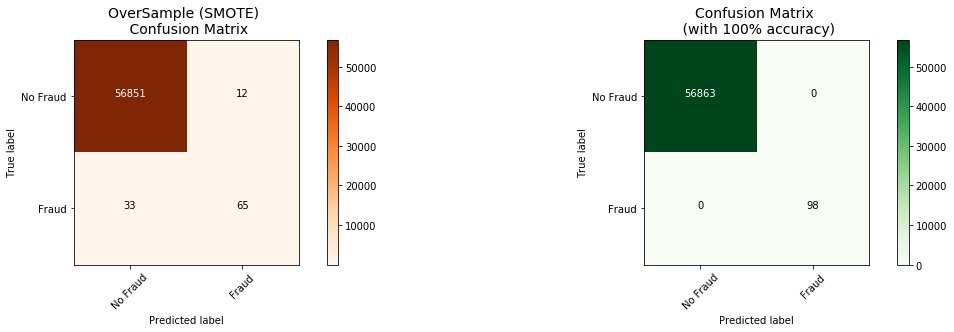

# **Conclusion:**


Implementing SMOTE on our imbalanced dataset helped us with the imbalance of our labels (more no fraud than fraud transactions). Nevertheless, I still have to state that sometimes the neural network on the oversampled dataset predicts less correct fraud transactions than our model using the undersample dataset. However, remember that the removal of outliers was implemented only on the random undersample dataset and not on the oversampled one. Also, in our undersample data our model is unable to detect for a large number of cases non fraud transactions correctly and instead, misclassifies those non fraud transactions as fraud cases. Imagine that people that were making regular purchases got their card blocked due to the reason that our model classified that transaction as a fraud transaction, this will be a huge disadvantage for the financial institution. The number of customer complaints and customer disatisfaction will increase. The next step of this analysis will be to do an outlier removal on our oversample dataset and see if our accuracy in the test set improves.


Note: One last thing, predictions and accuracies may be subjected to change since I implemented data shuffling on both types of dataframes. The main thing is to see if our models are able to correctly classify no fraud and fraud transactions. I will bring more updates, stay tuned!